# *Clasificador Crudos - Fondos*

### PCA y LDA

## **Importe Librerias**


In [1]:
#Librerias Tratamiento de datos
import pandas as pd
import numpy as np 
import openpyxl
import sklearn
import os

#Librerias Creacion de Modelos
from sklearn.model_selection import train_test_split #Partir datos de prueba y entrenamiento
from sklearn.preprocessing import StandardScaler    #Normalizar datos para manejar la misma escala
from sklearn.decomposition import PCA   #Algoritmo PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#Librerias Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


#Graficas
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import plot_decision_regions

In [2]:
print(sklearn.__version__)  # chekear si el ambiente funciona
print(pd.__version__)

1.0.2
1.3.5


## **Tratamiento datos**

In [3]:
#Dataset 40 muestras (Masas)
#Dataframe Supplementary_CCR_spectra
dt_Supp_spect = pd.read_csv("Data/Supplementary_CCR_spectra.csv",sep=",", decimal=",") #import dtframe

print(dt_Supp_spect.shape)
print("#"*62)
# print(dt_Supp_spect.dtypes)
print("#"*62)
dt_Supp_spect.head() #print dt frame

(59692, 41)
##############################################################
##############################################################


Molecules\Samples     CR1     CR2     CR3     CR4     CR5     CR6     CR7  \
0     C18H30         16.122  28.754  11.208  24.784   2.360   2.252   2.612   
1     C19H28         30.101  35.596  18.767  36.845  10.718   7.076  10.005   
2     C20H26         38.500  54.152  30.508  55.708  25.710  16.029  22.088   
3     C20H30         31.574  43.425  27.087  41.362  43.697  36.075  39.573   
4     C21H26         52.324  62.510  40.397  57.982  37.720  24.171  25.059   

      CR8     CR9  ...  VR10  VR11  VR12  VR13  VR14  VR15  VR16  VR17  VR18  \
0   2.020  17.854  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  11.003  35.712  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  28.136  50.344  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3  46.366  35.953  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4  41.800  63.023  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   VR19  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows x 41 columns]

In [4]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Suponiendo que los datos son numéricos
# plt.figure(figsize=(18,6))
# sns.barplot(data=dt_Supp_spect.head(), palette="Blues_d")
# plt.title('Datos de las primeras filas del DataFrame')
# plt.show()

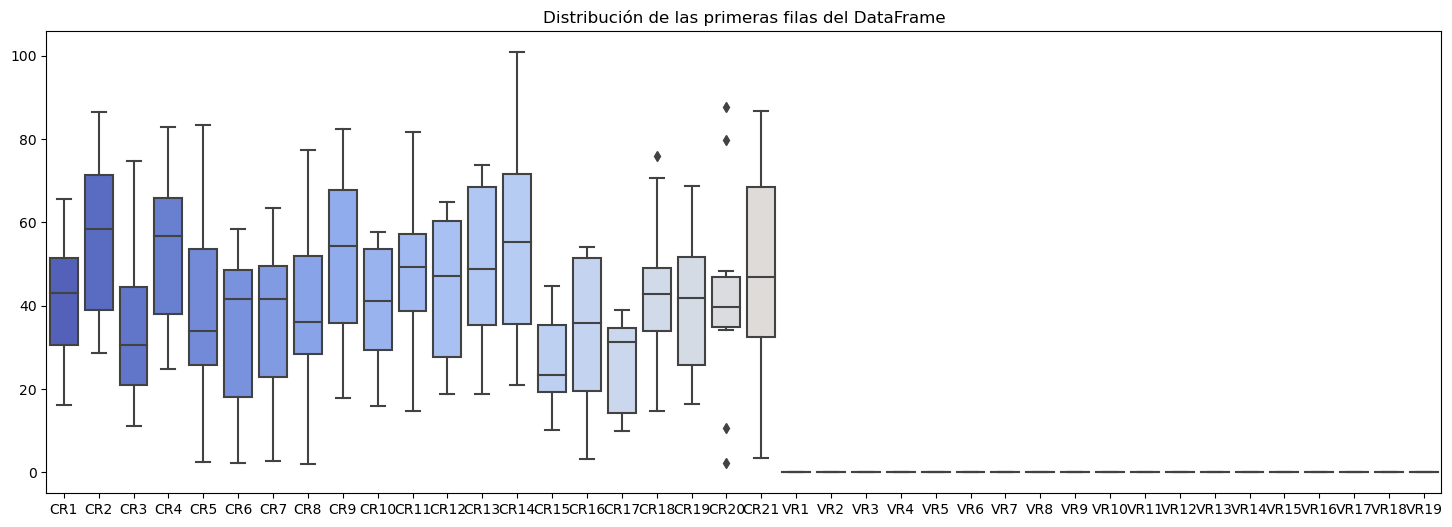

(59692, 41)


In [5]:
plt.figure(figsize=(18,6))
sns.boxplot(data=dt_Supp_spect.head(10), palette="coolwarm")
plt.title('Distribución de las primeras filas del DataFrame')
plt.show()
print(dt_Supp_spect.shape)

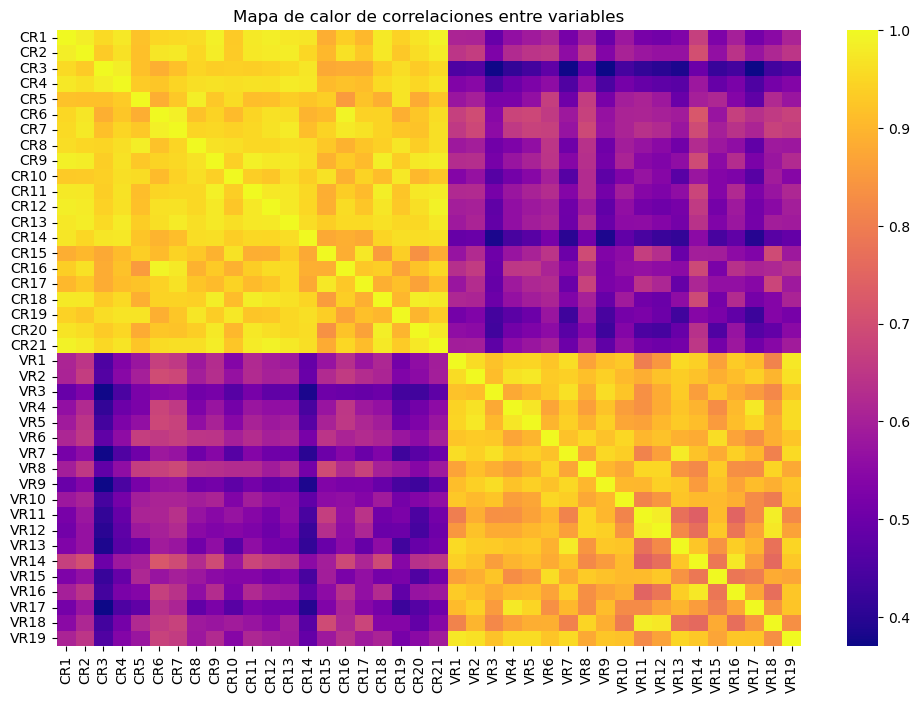

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(dt_Supp_spect.corr(), cmap='plasma', annot=False)
plt.title('Mapa de calor de correlaciones entre variables')
plt.show()

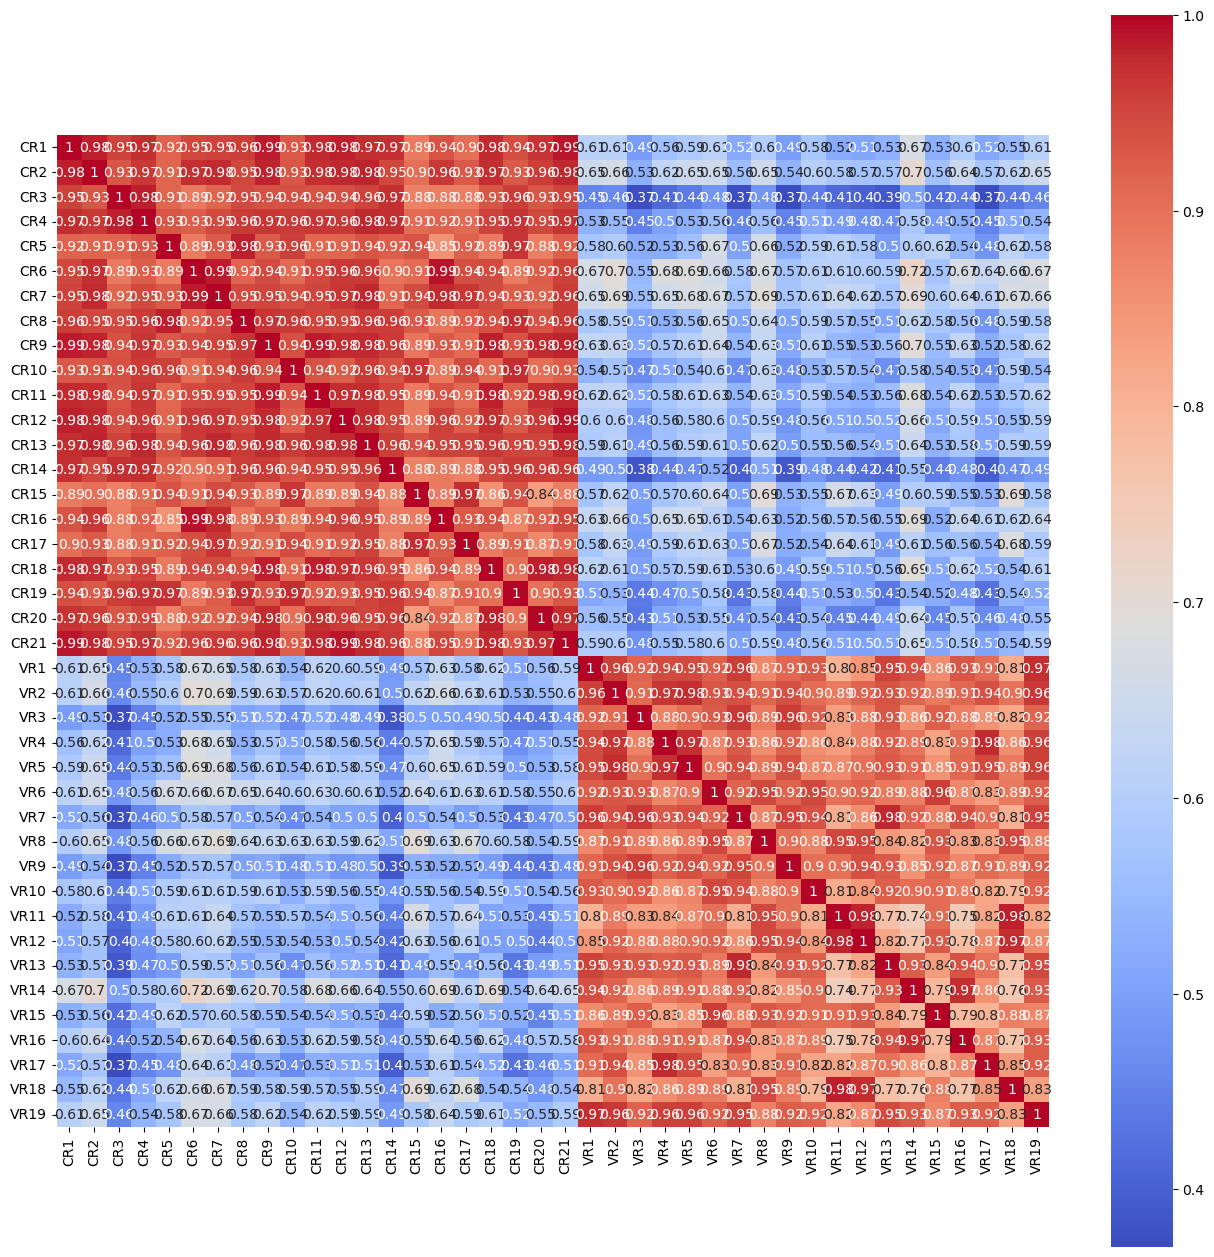

In [7]:
import seaborn as sns

plt.figure(figsize = (16,16))
sns.heatmap(dt_Supp_spect.corr(), square=True, annot=True, cmap="coolwarm")
plt.savefig("Graficas/heatmapCrudosFondosGases.png") 


In [8]:
dt_Supp_spect_molecules = dt_Supp_spect[['Molecules\\Samples']].copy()
dt_Supp_spect = dt_Supp_spect.drop(['Molecules\Samples'], axis=1)
dt_Supp_spect.head()
dt_Supp_spect_Cut=dt_Supp_spect

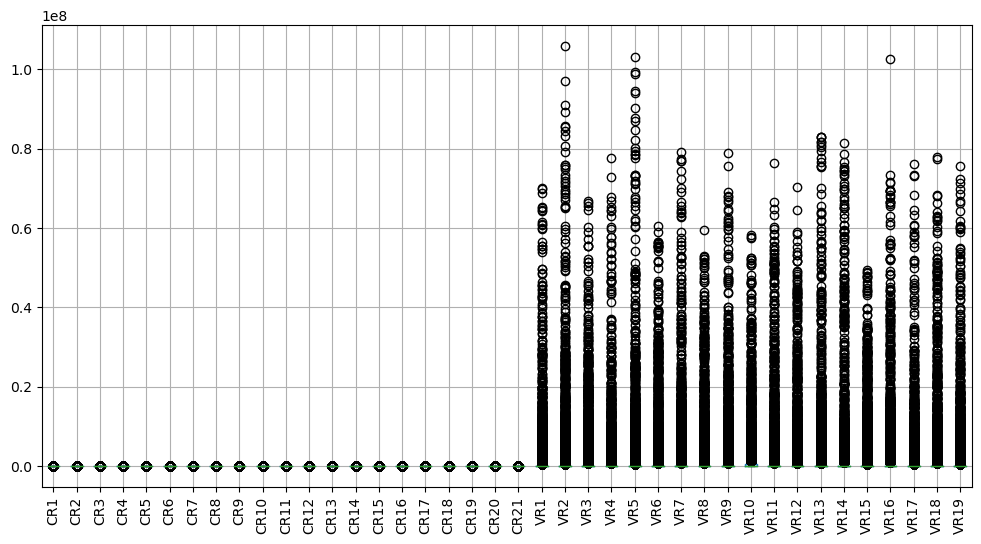

In [9]:
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura (12 de ancho, 6 de alto)
dt_Supp_spect.boxplot()
plt.xticks(rotation=90)
plt.show()

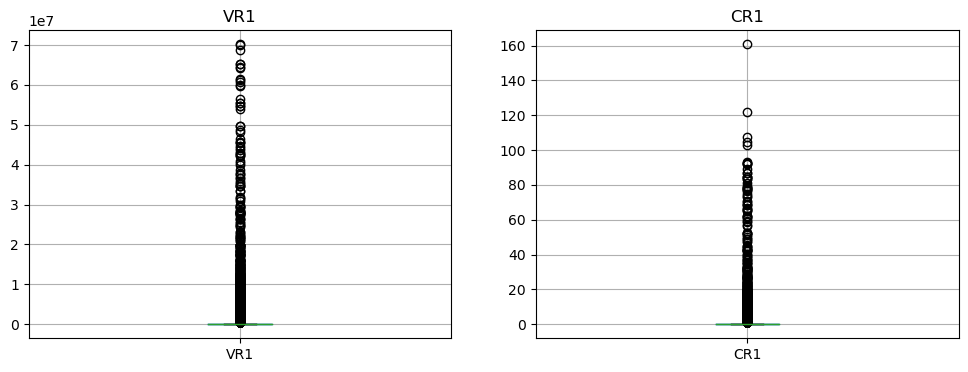

In [10]:
import matplotlib.pyplot as plt

# Especifica el tamaño de la figura
plt.figure(figsize=(12, 4))

# Boxplot para la columna 'VR1'
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
dt_Supp_spect.boxplot(column=['VR1'])
plt.title('VR1')

# Boxplot para la columna 'CR1'
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
dt_Supp_spect.boxplot(column=['CR1'])
plt.title('CR1')


plt.show()

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asumiendo que dt_Supp_spect tiene 38 columnas, con las primeras 19 para crudos y las siguientes 19 para fondos
# Separar el dataset en crudos y fondos
dt_Supp_spect_crudos = dt_Supp_spect.iloc[:, :21]
dt_Supp_spect_fondos = dt_Supp_spect.iloc[:, 21:40]

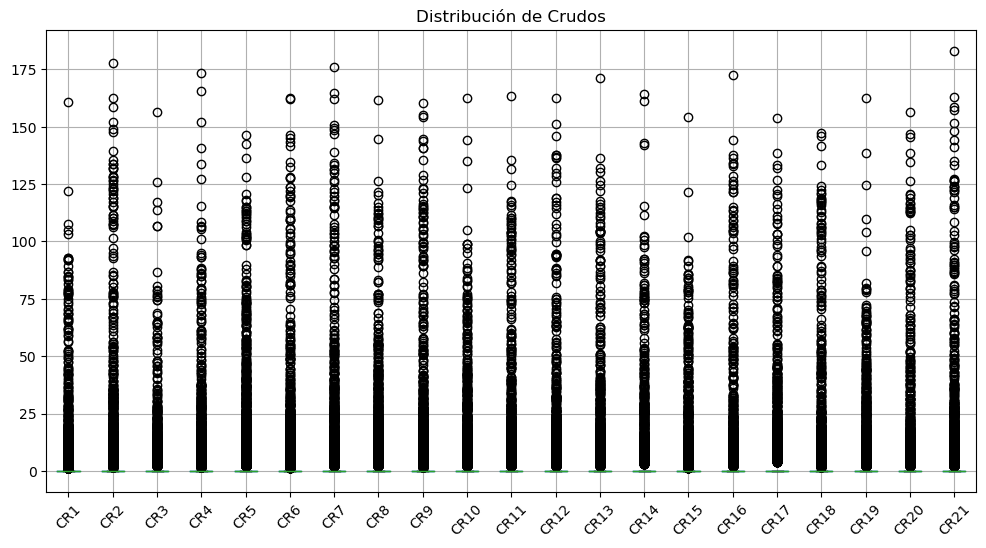

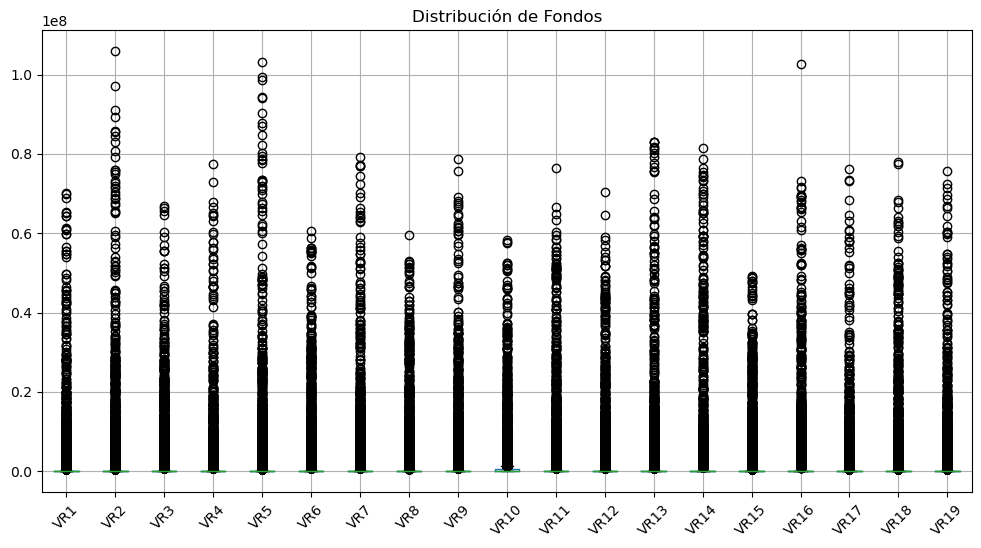

In [12]:
# Visualizar boxplots
plt.figure(figsize=(12, 6))
dt_Supp_spect_crudos.boxplot()
plt.title('Distribución de Crudos')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
dt_Supp_spect_fondos.boxplot()
plt.title('Distribución de Fondos')
plt.xticks(rotation=45)
plt.show()



## Normalizacion y Boxplot de datos

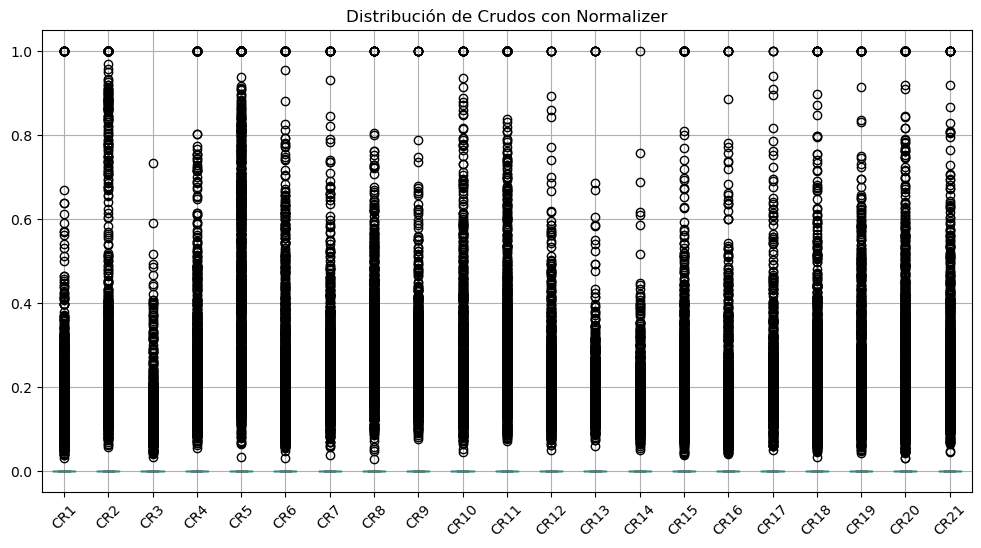

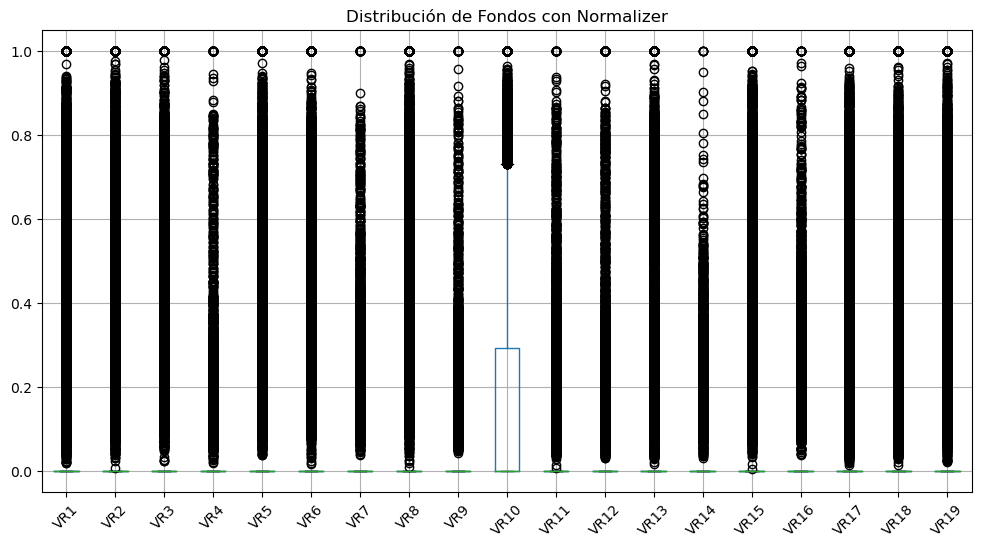

In [13]:
from sklearn.preprocessing import Normalizer

# Crear instancias del normalizador
normalizer_crudos = Normalizer()
normalizer_fondos = Normalizer()

# Normalizar cada subconjunto de datos
dt_Supp_spect_crudos_normalized = normalizer_crudos.fit_transform(dt_Supp_spect_crudos)
dt_Supp_spect_fondos_normalized = normalizer_fondos.fit_transform(dt_Supp_spect_fondos)

# Convertir a DataFrame
dt_Supp_spect_crudos_normalized = pd.DataFrame(dt_Supp_spect_crudos_normalized, columns=dt_Supp_spect_crudos.columns)
dt_Supp_spect_fondos_normalized = pd.DataFrame(dt_Supp_spect_fondos_normalized, columns=dt_Supp_spect_fondos.columns)

# Visualizar boxplots
plt.figure(figsize=(12, 6))
dt_Supp_spect_crudos_normalized.boxplot()
plt.title('Distribución de Crudos con Normalizer')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
dt_Supp_spect_fondos_normalized.boxplot()
plt.title('Distribución de Fondos con Normalizer')
plt.xticks(rotation=45)
plt.show()



In [14]:
## Volver a juntar los datasets separados (crudos - Fondos)
dt_Supp_spect = pd.concat([dt_Supp_spect_crudos_normalized, dt_Supp_spect_fondos_normalized], axis=1)
print(dt_Supp_spect.shape)
dt_Supp_spect.head()

(59692, 40)


CR1       CR2       CR3       CR4       CR5       CR6       CR7  \
0  0.228485  0.407509  0.158843  0.351245  0.033447  0.031916  0.037018   
1  0.288684  0.341384  0.179985  0.353362  0.102791  0.067862  0.095953   
2  0.230525  0.324244  0.182672  0.333561  0.153943  0.095976  0.132256   
3  0.166982  0.229657  0.143252  0.218747  0.231096  0.190786  0.209285   
4  0.261907  0.312893  0.202207  0.290228  0.188807  0.120988  0.125432   

        CR8       CR9      CR10  ...  VR10  VR11  VR12  VR13  VR14  VR15  \
0  0.028628  0.253031  0.226544  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.105524  0.342496  0.275583  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.168469  0.301443  0.250009  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.245211  0.190141  0.163920  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.209229  0.315461  0.203173  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   VR16  VR17  VR18  VR19  
0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0  

[5 rows x 40 columns]

## Reduccion Dimensionalidad

In [15]:
##eliminar y almacenar 0's
mask_nans = dt_Supp_spect.isnull().all(axis=1)
mask_zeros = (dt_Supp_spect == 0).all(axis=1)

# Filas a eliminar
dt_Supp_spect_eliminated = dt_Supp_spect[mask_nans | mask_zeros]

# Filas que quedan en el DataFrame original
dt_Supp_spect_cleaned = dt_Supp_spect[~(mask_nans | mask_zeros)]

# Opcional: mostrar la cantidad de filas eliminadas y restantes
print(f"Filas eliminadas: {len(dt_Supp_spect_eliminated)}")
print(f"Filas restantes: {len(dt_Supp_spect_cleaned)}")

print(dt_Supp_spect_eliminated.shape)
print(dt_Supp_spect_cleaned.shape)
dt_Supp_spect_eliminated.head()

Filas eliminadas: 4538
Filas restantes: 55154
(4538, 40)
(55154, 40)


CR1  CR2  CR3  CR4  CR5  CR6  CR7  CR8  CR9  CR10  ...  VR10  VR11  VR12  \
240  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   0.0   0.0   
247  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   0.0   0.0   
335  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   0.0   0.0   
485  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   0.0   0.0   
508  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   0.0   0.0   

     VR13  VR14  VR15  VR16  VR17  VR18  VR19  
240   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
247   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
335   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
485   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
508   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 40 columns]

In [16]:
# cleaned_Transpose=dt_Supp_spect_cleaned.transpose()
# cleaned_Transpose.head()

In [17]:

##Moleculas eliminadas, que no aportan informacion por contener 0's o nulos

# Crear una nueva columna en dt_Supp_spect_eliminated con las moléculas correspondientes usando .loc
dt_Supp_spect_eliminated.loc[:, 'Molecule'] = dt_Supp_spect_molecules.loc[dt_Supp_spect_eliminated.index, 'Molecules\\Samples'].values

# Reordenar las columnas para que la columna de moléculas esté al inicio
dt_Supp_spect_eliminated = dt_Supp_spect_eliminated[['Molecule'] + [col for col in dt_Supp_spect_eliminated.columns if col != 'Molecule']]

# Mostrar las primeras filas del DataFrame resultante
print("dt_Supp_spect_eliminated con moléculas correspondientes:")
print(dt_Supp_spect_eliminated.shape)
dt_Supp_spect_eliminated.head(10)


dt_Supp_spect_eliminated con moléculas correspondientes:
(4538, 41)


D:\Usuario\Programas\anaconda3\envs\MachineLearning\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Molecule  CR1  CR2  CR3  CR4  CR5  CR6  CR7  CR8  CR9  ...  VR10  \
240  C81H58         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
247  C28H6          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
335  C29H49N1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
485  C66H35N1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
508  C23H23N1O1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
509  C24H25N1O1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
511  C24H35N1O1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
513  C25H27N1O1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
514  C25H29N1O1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
515  C26H31N1O1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

     VR11  VR12  VR13  VR14  VR15  VR16  VR17  VR18  VR19  
240   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
247   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
335   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
485   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
508   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
509   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
511   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
513   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
514   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
515   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[10 rows x 41 columns]

In [18]:
# Copiar moleculas con valores nulos en el clipboard para hacer un analisis de ellas 
dt_Supp_spect_eliminated['Molecule'].to_clipboard(index=False)
print("Las moléculas han sido copiadas al portapapeles.")

Las moléculas han sido copiadas al portapapeles.


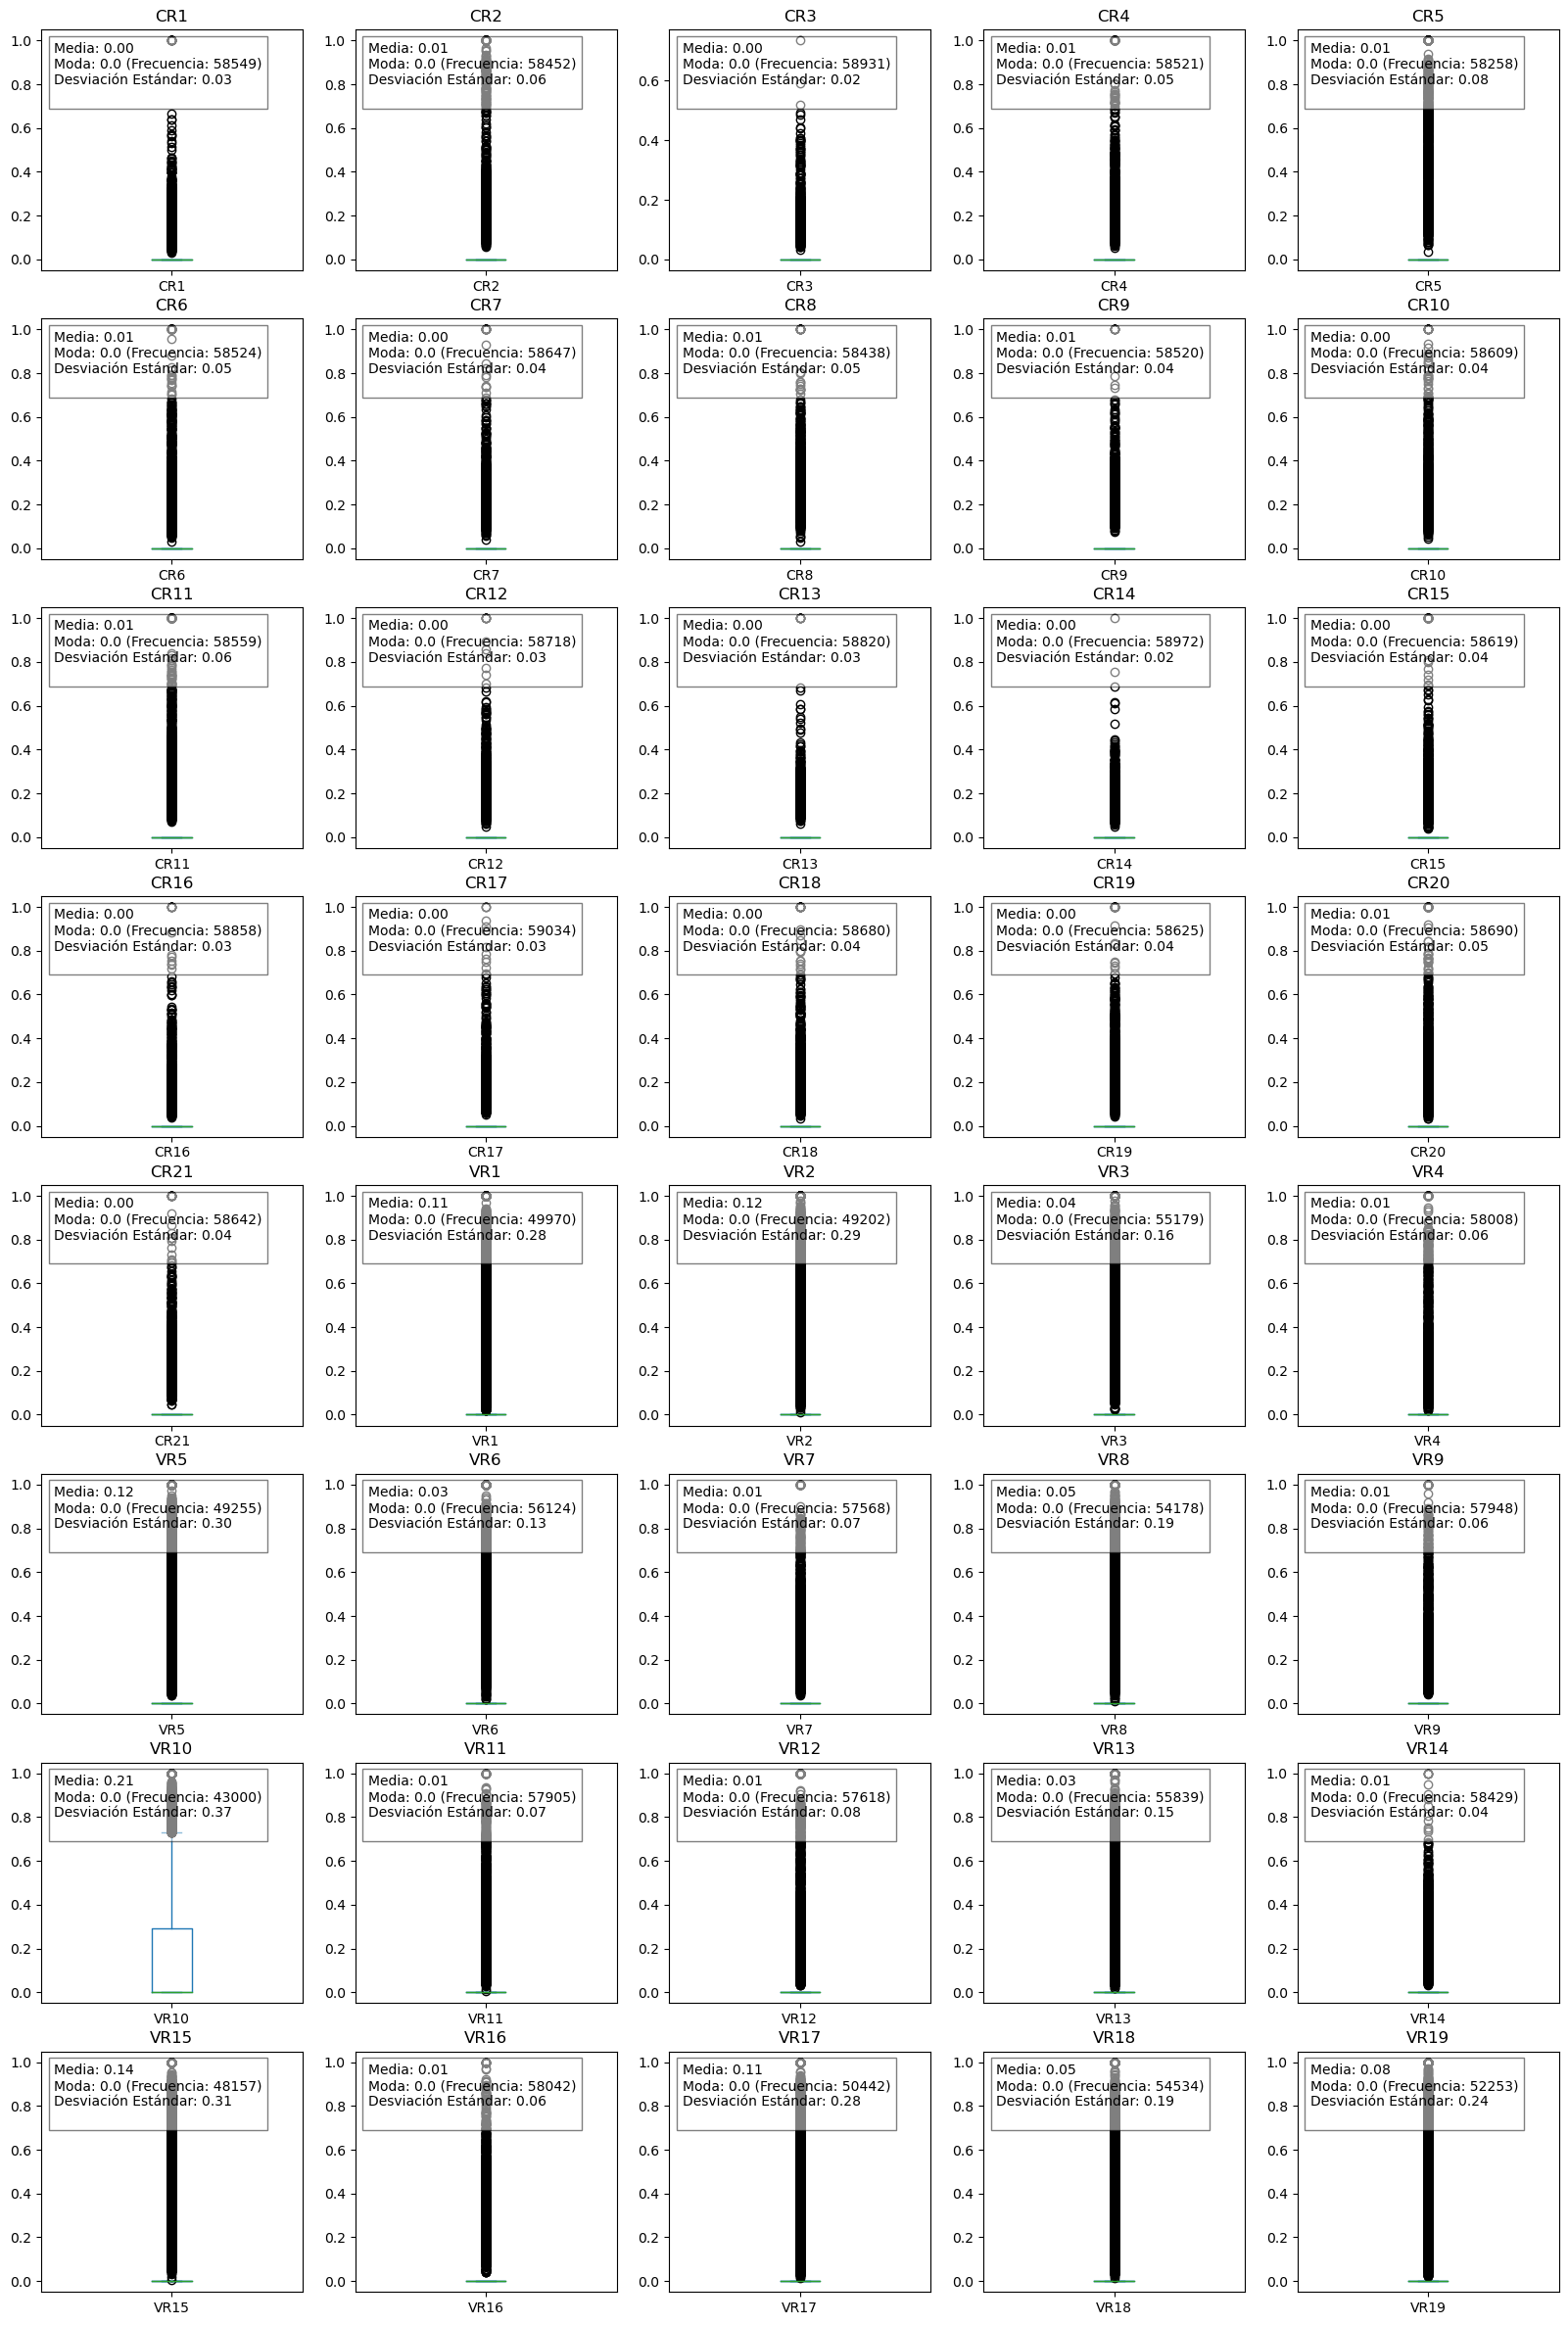

In [19]:
import matplotlib.pyplot as plt

# Especifica el tamaño de la figura para cada boxplot
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 30))  # subplot8*5

for i, column in enumerate(dt_Supp_spect.columns):
    row_index = i // 5 
    col_index = i % 5  
    dt_Supp_spect[column].plot(kind='box', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(column) 
    
    # Calcular Informacion
    mean = dt_Supp_spect[column].mean()
    mode = dt_Supp_spect[column].mode().iloc[0]  # Puede haber más de una moda, tomamos la primera
    mode_count = dt_Supp_spect[column].value_counts().max()  # Cantidad de veces que se repite la moda
    std_dev = dt_Supp_spect[column].std()
    
    # Mostrar informacion
    info_text = f"Media: {mean:.2f}\nModa: {mode} (Frecuencia: {mode_count})\nDesviación Estándar: {std_dev:.2f}\n"
    axes[row_index, col_index].text(0.05, 0.95, info_text, transform=axes[row_index, col_index].transAxes,
                                    verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Guarda la figura como una imagen única
plt.savefig('Graficas/BoxplotsCrudosFondos.png')  # Puedes especificar la ruta y el nombre del archivo

# Muestra los gráficos
plt.show()


In [20]:
dt_Supp_spect_cleaned_transpose = dt_Supp_spect_cleaned.transpose()
dt_Supp_spect_cleaned_transpose

0         1         2         3         4         5         6      \
CR1   0.228485  0.288684  0.230525  0.166982  0.261907  0.143087  0.239547   
CR2   0.407509  0.341384  0.324244  0.229657  0.312893  0.225219  0.299156   
CR3   0.158843  0.179985  0.182672  0.143252  0.202207  0.091430  0.188030   
CR4   0.351245  0.353362  0.333561  0.218747  0.290228  0.164312  0.302438   
CR5   0.033447  0.102791  0.153943  0.231096  0.188807  0.179648  0.207757   
CR6   0.031916  0.067862  0.095976  0.190786  0.120988  0.282939  0.171209   
CR7   0.037018  0.095953  0.132256  0.209285  0.125432  0.262296  0.187975   
CR8   0.028628  0.105524  0.168469  0.245211  0.209229  0.182565  0.196180   
CR9   0.253031  0.342496  0.301443  0.190141  0.315461  0.176461  0.252944   
CR10  0.226544  0.275583  0.250009  0.163920  0.203173  0.172421  0.197854   
CR11  0.208389  0.199924  0.228897  0.284177  0.201956  0.279013  0.213362   
CR12  0.338745  0.181184  0.156470  0.343140  0.160536  0.306894  0.210124   
CR13  0.267714  0.290276  0.257668  0.196937  0.274286  0.208160  0.268861   
CR14  0.297830  0.311365  0.315347  0.236643  0.338175  0.176635  0.284136   
CR15  0.144670  0.176897  0.148716  0.095565  0.110096  0.128267  0.133078   
CR16  0.046442  0.097085  0.108688  0.164163  0.117979  0.324854  0.148039   
CR17  0.267161  0.122049  0.059703  0.167220  0.059791  0.222176  0.127218   
CR18  0.209310  0.156997  0.227633  0.264350  0.163369  0.258388  0.168015   
CR19  0.230852  0.233721  0.234944  0.158229  0.229411  0.120608  0.223999   
CR20  0.032058  0.101352  0.222514  0.219381  0.189978  0.205417  0.176077   
CR21  0.048086  0.122193  0.167930  0.306384  0.237936  0.276960  0.262608   
VR1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR16  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR17  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         7         8         9      ...  59682  59683  59684  59685  59686  \
CR1   0.210565  0.164406  0.198990  ...    0.0    0.0    0.0    0.0    0.0   
CR2   0.323037  0.222037  0.264886  ...    0.0    0.0    0.0    0.0    0.0   
CR3   0.135426  0.154087  0.228720  ...    0.0    0.0    0.0    0.0    0.0   
CR4   0.265793  0.227296  0.243436  ...    0.0    0.0    0.0    0.0    0.0   
CR5   0.116638  0.279470  0.245515  ...    0.0    0.0    0.0    0.0    0.0   
CR6   0.216570  0.196082  0.174029  ...    0.0    1.0    1.0    1.0    1.0   
CR7   0.194138  0.212884  0.166931  ...    0.0    0.0    0.0    0.0    0.0   
CR8   0.129138  0.259166  0.235144  ...    0.0    0.0    0.0    0.0    0.0   
CR9   0.257104  0.246041  0.252757  ...    0.0    0.0    0.0    0.0    0.0   
CR10  0.231829  0.180779  0.17

## Revision Variables

In [21]:
#Dt_Supp_spect - Transpuesta valuesTranspose Valt
valt=dt_Supp_spect_cleaned.transpose() 
print(type(valt))
print(valt.shape)
valt = valt.loc[:, (valt != 0).any(axis=0)]
dt_Supp_spect = valt.transpose()
print(dt_Supp_spect.shape)
print("Diff", valt.shape[1])
print("Diff", (59692-dt_Supp_spect.shape[0]))


dt_Supp_spect.fillna(0, inplace=True)
valt.fillna(0, inplace=True)
print(dt_Supp_spect.shape)
dt_Supp_spect.head()


<class 'pandas.core.frame.DataFrame'>
(40, 55154)
(55154, 40)
Diff 55154
Diff 4538
(55154, 40)


CR1       CR2       CR3       CR4       CR5       CR6       CR7  \
0  0.228485  0.407509  0.158843  0.351245  0.033447  0.031916  0.037018   
1  0.288684  0.341384  0.179985  0.353362  0.102791  0.067862  0.095953   
2  0.230525  0.324244  0.182672  0.333561  0.153943  0.095976  0.132256   
3  0.166982  0.229657  0.143252  0.218747  0.231096  0.190786  0.209285   
4  0.261907  0.312893  0.202207  0.290228  0.188807  0.120988  0.125432   

        CR8       CR9      CR10  ...  VR10  VR11  VR12  VR13  VR14  VR15  \
0  0.028628  0.253031  0.226544  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.105524  0.342496  0.275583  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.168469  0.301443  0.250009  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.245211  0.190141  0.163920  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.209229  0.315461  0.203173  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   VR16  VR17  VR18  VR19  
0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0  

[5 rows x 40 columns]

In [22]:
valt = dt_Supp_spect.transpose()
valt.head()

0         1         2         3         4         5         6      \
CR1  0.228485  0.288684  0.230525  0.166982  0.261907  0.143087  0.239547   
CR2  0.407509  0.341384  0.324244  0.229657  0.312893  0.225219  0.299156   
CR3  0.158843  0.179985  0.182672  0.143252  0.202207  0.091430  0.188030   
CR4  0.351245  0.353362  0.333561  0.218747  0.290228  0.164312  0.302438   
CR5  0.033447  0.102791  0.153943  0.231096  0.188807  0.179648  0.207757   

        7         8         9      ...  59682  59683  59684  59685  59686  \
CR1  0.210565  0.164406  0.198990  ...    0.0    0.0    0.0    0.0    0.0   
CR2  0.323037  0.222037  0.264886  ...    0.0    0.0    0.0    0.0    0.0   
CR3  0.135426  0.154087  0.228720  ...    0.0    0.0    0.0    0.0    0.0   
CR4  0.265793  0.227296  0.243436  ...    0.0    0.0    0.0    0.0    0.0   
CR5  0.116638  0.279470  0.245515  ...    0.0    0.0    0.0    0.0    0.0   

     59687  59688  59689  59690  59691  
CR1    0.0    0.0    0.0    0.0    0.0  
CR2    0.0    0.0    0.0    0.0    0.0  
CR3    0.0    0.0    0.0    0.0    0.0  
CR4    0.0    0.0    0.0    0.0    0.0  
CR5    0.0    0.0    0.0    0.0    0.0  

[5 rows x 55154 columns]

In [23]:
# Una manera de normalizar ... 
#suma de la columna de los valores Transpuestos
# valSum=valt.sum(axis=1)
# valorSumados=valSum.values
# print(valorSumados)
# print(valorSumados.shape)

In [24]:
# suma=valorSumados.reshape(40,1) #Reshape
# print(suma.shape) 
# valtn=valt/suma 

# #Dt_Supp_spect - Transpuestos/SumaColumnas
# valtn.head()


In [25]:
# valt = valt.fillna(0, inplace=True)
print(valt)

         0         1         2         3         4         5         6      \
CR1   0.228485  0.288684  0.230525  0.166982  0.261907  0.143087  0.239547   
CR2   0.407509  0.341384  0.324244  0.229657  0.312893  0.225219  0.299156   
CR3   0.158843  0.179985  0.182672  0.143252  0.202207  0.091430  0.188030   
CR4   0.351245  0.353362  0.333561  0.218747  0.290228  0.164312  0.302438   
CR5   0.033447  0.102791  0.153943  0.231096  0.188807  0.179648  0.207757   
CR6   0.031916  0.067862  0.095976  0.190786  0.120988  0.282939  0.171209   
CR7   0.037018  0.095953  0.132256  0.209285  0.125432  0.262296  0.187975   
CR8   0.028628  0.105524  0.168469  0.245211  0.209229  0.182565  0.196180   
CR9   0.253031  0.342496  0.301443  0.190141  0.315461  0.176461  0.252944   
CR10  0.226544  0.275583  0.250009  0.163920  0.203173  0.172421  0.197854   
CR11  0.208389  0.199924  0.228897  0.284177  0.201956  0.279013  0.213362   
CR12  0.338745  0.181184  0.156470  0.343140  0.160536  0.306894

In [26]:
dt_Supp_spect_cleaned_transpose


0         1         2         3         4         5         6      \
CR1   0.228485  0.288684  0.230525  0.166982  0.261907  0.143087  0.239547   
CR2   0.407509  0.341384  0.324244  0.229657  0.312893  0.225219  0.299156   
CR3   0.158843  0.179985  0.182672  0.143252  0.202207  0.091430  0.188030   
CR4   0.351245  0.353362  0.333561  0.218747  0.290228  0.164312  0.302438   
CR5   0.033447  0.102791  0.153943  0.231096  0.188807  0.179648  0.207757   
CR6   0.031916  0.067862  0.095976  0.190786  0.120988  0.282939  0.171209   
CR7   0.037018  0.095953  0.132256  0.209285  0.125432  0.262296  0.187975   
CR8   0.028628  0.105524  0.168469  0.245211  0.209229  0.182565  0.196180   
CR9   0.253031  0.342496  0.301443  0.190141  0.315461  0.176461  0.252944   
CR10  0.226544  0.275583  0.250009  0.163920  0.203173  0.172421  0.197854   
CR11  0.208389  0.199924  0.228897  0.284177  0.201956  0.279013  0.213362   
CR12  0.338745  0.181184  0.156470  0.343140  0.160536  0.306894  0.210124   
CR13  0.267714  0.290276  0.257668  0.196937  0.274286  0.208160  0.268861   
CR14  0.297830  0.311365  0.315347  0.236643  0.338175  0.176635  0.284136   
CR15  0.144670  0.176897  0.148716  0.095565  0.110096  0.128267  0.133078   
CR16  0.046442  0.097085  0.108688  0.164163  0.117979  0.324854  0.148039   
CR17  0.267161  0.122049  0.059703  0.167220  0.059791  0.222176  0.127218   
CR18  0.209310  0.156997  0.227633  0.264350  0.163369  0.258388  0.168015   
CR19  0.230852  0.233721  0.234944  0.158229  0.229411  0.120608  0.223999   
CR20  0.032058  0.101352  0.222514  0.219381  0.189978  0.205417  0.176077   
CR21  0.048086  0.122193  0.167930  0.306384  0.237936  0.276960  0.262608   
VR1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR16  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR17  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         7         8         9      ...  59682  59683  59684  59685  59686  \
CR1   0.210565  0.164406  0.198990  ...    0.0    0.0    0.0    0.0    0.0   
CR2   0.323037  0.222037  0.264886  ...    0.0    0.0    0.0    0.0    0.0   
CR3   0.135426  0.154087  0.228720  ...    0.0    0.0    0.0    0.0    0.0   
CR4   0.265793  0.227296  0.243436  ...    0.0    0.0    0.0    0.0    0.0   
CR5   0.116638  0.279470  0.245515  ...    0.0    0.0    0.0    0.0    0.0   
CR6   0.216570  0.196082  0.174029  ...    0.0    1.0    1.0    1.0    1.0   
CR7   0.194138  0.212884  0.166931  ...    0.0    0.0    0.0    0.0    0.0   
CR8   0.129138  0.259166  0.235144  ...    0.0    0.0    0.0    0.0    0.0   
CR9   0.257104  0.246041  0.252757  ...    0.0    0.0    0.0    0.0    0.0   
CR10  0.231829  0.180779  0.17

In [27]:
valt

0         1         2         3         4         5         6      \
CR1   0.228485  0.288684  0.230525  0.166982  0.261907  0.143087  0.239547   
CR2   0.407509  0.341384  0.324244  0.229657  0.312893  0.225219  0.299156   
CR3   0.158843  0.179985  0.182672  0.143252  0.202207  0.091430  0.188030   
CR4   0.351245  0.353362  0.333561  0.218747  0.290228  0.164312  0.302438   
CR5   0.033447  0.102791  0.153943  0.231096  0.188807  0.179648  0.207757   
CR6   0.031916  0.067862  0.095976  0.190786  0.120988  0.282939  0.171209   
CR7   0.037018  0.095953  0.132256  0.209285  0.125432  0.262296  0.187975   
CR8   0.028628  0.105524  0.168469  0.245211  0.209229  0.182565  0.196180   
CR9   0.253031  0.342496  0.301443  0.190141  0.315461  0.176461  0.252944   
CR10  0.226544  0.275583  0.250009  0.163920  0.203173  0.172421  0.197854   
CR11  0.208389  0.199924  0.228897  0.284177  0.201956  0.279013  0.213362   
CR12  0.338745  0.181184  0.156470  0.343140  0.160536  0.306894  0.210124   
CR13  0.267714  0.290276  0.257668  0.196937  0.274286  0.208160  0.268861   
CR14  0.297830  0.311365  0.315347  0.236643  0.338175  0.176635  0.284136   
CR15  0.144670  0.176897  0.148716  0.095565  0.110096  0.128267  0.133078   
CR16  0.046442  0.097085  0.108688  0.164163  0.117979  0.324854  0.148039   
CR17  0.267161  0.122049  0.059703  0.167220  0.059791  0.222176  0.127218   
CR18  0.209310  0.156997  0.227633  0.264350  0.163369  0.258388  0.168015   
CR19  0.230852  0.233721  0.234944  0.158229  0.229411  0.120608  0.223999   
CR20  0.032058  0.101352  0.222514  0.219381  0.189978  0.205417  0.176077   
CR21  0.048086  0.122193  0.167930  0.306384  0.237936  0.276960  0.262608   
VR1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR16  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR17  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         7         8         9      ...  59682  59683  59684  59685  59686  \
CR1   0.210565  0.164406  0.198990  ...    0.0    0.0    0.0    0.0    0.0   
CR2   0.323037  0.222037  0.264886  ...    0.0    0.0    0.0    0.0    0.0   
CR3   0.135426  0.154087  0.228720  ...    0.0    0.0    0.0    0.0    0.0   
CR4   0.265793  0.227296  0.243436  ...    0.0    0.0    0.0    0.0    0.0   
CR5   0.116638  0.279470  0.245515  ...    0.0    0.0    0.0    0.0    0.0   
CR6   0.216570  0.196082  0.174029  ...    0.0    1.0    1.0    1.0    1.0   
CR7   0.194138  0.212884  0.166931  ...    0.0    0.0    0.0    0.0    0.0   
CR8   0.129138  0.259166  0.235144  ...    0.0    0.0    0.0    0.0    0.0   
CR9   0.257104  0.246041  0.252757  ...    0.0    0.0    0.0    0.0    0.0   
CR10  0.231829  0.180779  0.17

## PCA

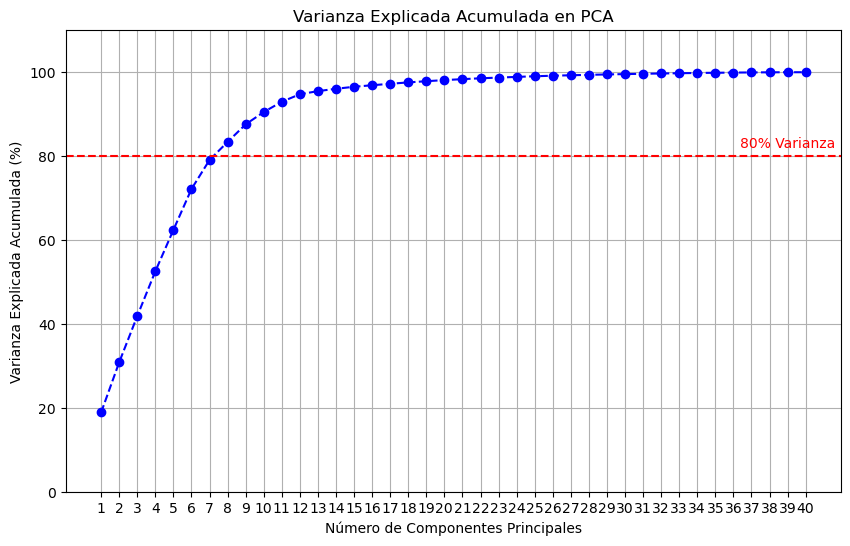

In [28]:
# Realizar PCA
pca = PCA()
pca.fit(valt)

# Calcular la varianza explicada acumulada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada) * 100  # Multiplicar por 100 para obtener porcentajes

# Graficar % de varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada en PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada (%)')  # Cambiado a porcentaje
plt.xticks(range(1, len(varianza_acumulada) + 1))
plt.ylim(0, 110)  # Escala de 0 a 100%
plt.grid()

# Línea para el umbral del 95% (ajustar este valor si es necesario)
umbral_varianza = 80  # Cambia este valor si deseas otro umbral
plt.axhline(y=umbral_varianza, color='r', linestyle='--')  
plt.text(len(varianza_acumulada) - 1, umbral_varianza + 2, f'{umbral_varianza}% Varianza', color='red', ha='center')
plt.savefig('Graficas/%VarianzaExplicadaAcumuladaEspectroscopiaMasas.png')
plt.show()


In [29]:
## Varianza explicada por los 8 componentes
## Generacion de PCA
n_componentes = 8
pca = PCA(n_components=n_componentes)
valtn_transformado = pca.fit_transform(valt)

# Mostrar la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_ * 100
print("Varianza explicada por cada uno de los 8 componentes:")
for i, var in enumerate(varianza_explicada, start=1):
    print(f"Componente {i}: {var:.2f}%")

# Guardar los datos transformados en un DataFrame
valtn_pca = pd.DataFrame(data=valtn_transformado, columns=[f'Componente_{i}' for i in range(1, n_componentes + 1)])

# Mostrar las primeras filas del DataFrame transformado
print("\nPrimeras filas de los datos transformados:")
print(valtn_pca.shape)
print(type(valtn_pca))
print(valtn_pca.head())

Varianza explicada por cada uno de los 8 componentes:
Componente 1: 18.99%
Componente 2: 11.94%
Componente 3: 11.00%
Componente 4: 10.65%
Componente 5: 9.86%
Componente 6: 9.74%
Componente 7: 6.92%
Componente 8: 4.30%

Primeras filas de los datos transformados:
(40, 8)
<class 'pandas.core.frame.DataFrame'>
   Componente_1  Componente_2  Componente_3  Componente_4  Componente_5  \
0     -3.760714     -3.628246     -2.702509     -0.690268     -2.018484   
1     -3.743025     -3.521526     -2.346796     -0.356200     -2.142034   
2     -3.935149     -3.669976     -2.678205     -0.700057     -2.112700   
3     -3.831105     -3.522961     -2.630393     -0.642041     -2.160648   
4     -3.294024     -2.507006     -3.133855     -0.645363     -2.398493   

   Componente_6  Componente_7  Componente_8  
0      0.052729     -1.565961     -2.370508  
1      0.036646     -1.629253     -2.294697  
2      0.170882     -1.747822     -2.202057  
3      0.012042     -1.697254     -2.150785  
4     -0.32

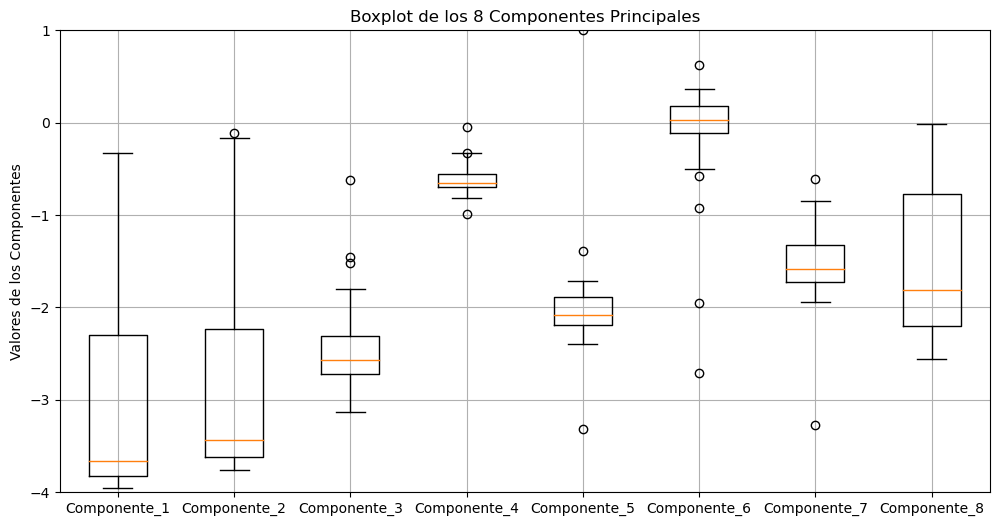

In [30]:
import matplotlib.pyplot as plt

# Crear un boxplot para los 8 componentes utilizando Matplotlib
plt.figure(figsize=(12, 6))
plt.boxplot([valtn_pca[f'Componente_{i}'] for i in range(1, 9)], labels=[f'Componente_{i}' for i in range(1, 9)])
plt.title('Boxplot de los 8 Componentes Principales')
plt.ylabel('Valores de los Componentes')
plt.ylim(-4, 1)  # Establecer los límites del eje y entre -5 y 5
plt.grid(True)
plt.show()



In [31]:
## Mostrar datos trasformados a pca
print(type(valtn_pca))
print(valtn_pca.shape)
valtn_pca.head(8)

<class 'pandas.core.frame.DataFrame'>
(40, 8)


Componente_1  Componente_2  Componente_3  Componente_4  Componente_5  \
0     -3.760714     -3.628246     -2.702509     -0.690268     -2.018484   
1     -3.743025     -3.521526     -2.346796     -0.356200     -2.142034   
2     -3.935149     -3.669976     -2.678205     -0.700057     -2.112700   
3     -3.831105     -3.522961     -2.630393     -0.642041     -2.160648   
4     -3.294024     -2.507006     -3.133855     -0.645363     -2.398493   
5     -3.815183     -3.492780     -2.362946     -0.582707     -1.970244   
6     -3.890573     -3.526091     -2.558175     -0.641111     -2.175580   
7     -3.653752     -3.239644     -2.931090     -0.649613     -2.318138   

   Componente_6  Componente_7  Componente_8  
0      0.052729     -1.565961     -2.370508  
1      0.036646     -1.629253     -2.294697  
2      0.170882     -1.747822     -2.202057  
3      0.012042     -1.697254     -2.150785  
4     -0.329500     -1.441962     -0.823904  
5      0.261556     -1.673870     -2.120643  
6      0.185938     -1.770107     -1.870731  
7     -0.012854     -1.706315     -1.730115

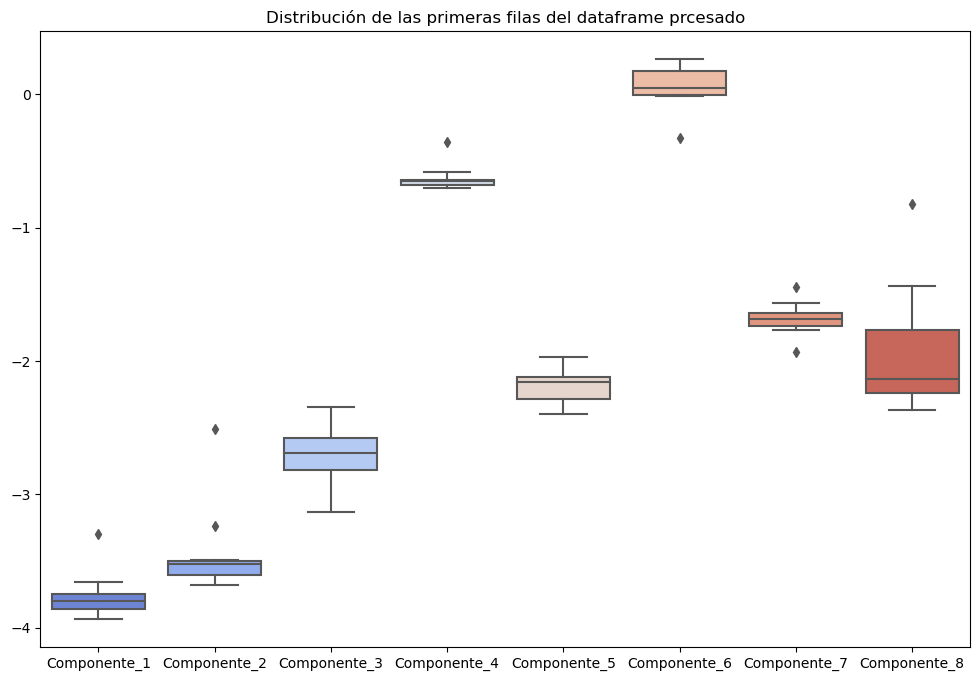

(40, 8)


In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(data=valtn_pca.head(10), palette="coolwarm")
plt.title('Distribución de las primeras filas del dataframe prcesado')
plt.show()
print(valtn_pca.shape)

## PCA con otro metodo de normalizacion (mejores resultados)

In [33]:
#Dt_Supp_spect - Transpuesta valuesTranspose Valt
dtSuppTranspose=dt_Supp_spect_Cut.transpose() 
print(type(dtSuppTranspose))
print(dtSuppTranspose.shape)
dtSuppTranspose


<class 'pandas.core.frame.DataFrame'>
(40, 59692)


0       1       2       3       4       5       6       7       8      \
CR1   16.122  30.101  38.500  31.574  52.324  23.838  65.693  47.620  49.053   
CR2   28.754  35.596  54.152  43.425  62.510  37.521  82.040  73.056  66.248   
CR3   11.208  18.767  30.508  27.087  40.397  15.232  51.565  30.627  45.974   
CR4   24.784  36.845  55.708  41.362  57.982  27.374  82.940  60.110  67.817   
CR5    2.360  10.718  25.710  43.697  37.720  29.929  56.975  26.378  83.384   
CR6    2.252   7.076  16.029  36.075  24.171  47.137  46.952  48.978  58.504   
CR7    2.612  10.005  22.088  39.573  25.059  43.698  51.550  43.905  63.517   
CR8    2.020  11.003  28.136  46.366  41.800  30.415  53.800  29.205  77.326   
CR9   17.854  35.712  50.344  35.953  63.023  29.398  69.367  58.145  73.410   
CR10  15.985  28.735  41.754  30.995  40.590  28.725  54.259  52.429  53.938   
CR11  14.704  20.846  38.228  53.734  40.347  46.483  58.512  52.152  74.105   
CR12  23.902  18.892  26.132  64.883  32.072  51.128  57.624  42.954  61.165   
CR13  18.890  30.267  43.033  37.238  54.797  34.679  73.732  71.001  60.686   
CR14  21.015  32.466  52.666  44.746  67.561  29.427  77.921  57.996  73.053   
CR15  10.208  18.445  24.837  18.070  21.995  21.369  36.495  44.795  31.657   
CR16   3.277  10.123  18.152  31.041  23.570  54.120  40.598  52.246  52.057   
CR17  18.851  12.726   9.971  31.619  11.945  37.014  34.888  38.892  30.831   
CR18  14.769  16.370  38.017  49.985  32.638  43.047  46.076  42.656  76.047   
CR19  16.289  24.370  39.238  29.919  45.832  20.093  61.429  44.684  53.722   
CR20   2.262  10.568  37.162  41.482  37.954  34.222  48.287  42.975  87.730   
CR21   3.393  12.741  28.046  57.933  47.535  46.141  72.017  45.859  86.865   
VR1    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR2    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR3    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR4    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR5    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR6    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR7    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR8    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR9    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR10   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR11   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR12   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR13   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR14   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR15   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR16   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR17   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR18   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
VR19   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   

        9      ...  59682  59683  59684  59685  59686  59687  59688  59689  \
CR1    64.986  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
CR2    86.506  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
CR3    74.695  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
CR4    79.501  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
CR5    80.180  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
CR6    56.834  ...  0.000  1.528  1.728  1.702  1.521  1.506  2.188  0.000   
CR7    54.516  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000  2.299   
CR8    76.793  ...  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
CR9    82.545  ...  0.00

In [34]:
#suma de la columna de los valores Transpuestos
dtSuppTransposeSum=dtSuppTranspose.sum(axis=1)
valorSumadosdtSuppTransform=dtSuppTransposeSum.values
print(valorSumadosdtSuppTransform)
print(valorSumadosdtSuppTransform.shape)

[1.25472100e+04 1.90225510e+04 8.98074600e+03 1.44428880e+04
 2.18918860e+04 1.63737530e+04 1.75341110e+04 1.83244430e+04
 1.83521630e+04 1.51162840e+04 1.71731940e+04 1.49102280e+04
 1.46795760e+04 1.21932250e+04 1.33428030e+04 1.33473720e+04
 1.39409160e+04 1.49871610e+04 1.30393250e+04 1.47125470e+04
 1.72299310e+04 1.59385229e+10 1.89512231e+10 1.44464857e+10
 8.49934500e+09 1.83994296e+10 1.39371284e+10 1.23794793e+10
 1.50232029e+10 1.12273875e+10 2.08628205e+10 1.16355489e+10
 1.06232867e+10 1.40481007e+10 1.11568083e+10 1.83979330e+10
 1.18917715e+10 1.34735674e+10 1.39156885e+10 1.47676267e+10]
(40,)


In [35]:
sumaResahpe=valorSumadosdtSuppTransform.reshape(40,1) #Reshape
dtSuppTransposeNormalized=dtSuppTranspose/sumaResahpe 

#dt_List_Comp - Transpuestos/SumaColumnas
dtSuppTransposeNormalized

0         1         2         3         4         5         6      \
CR1   0.001285  0.002399  0.003068  0.002516  0.004170  0.001900  0.005236   
CR2   0.001512  0.001871  0.002847  0.002283  0.003286  0.001972  0.004313   
CR3   0.001248  0.002090  0.003397  0.003016  0.004498  0.001696  0.005742   
CR4   0.001716  0.002551  0.003857  0.002864  0.004015  0.001895  0.005743   
CR5   0.000108  0.000490  0.001174  0.001996  0.001723  0.001367  0.002603   
CR6   0.000138  0.000432  0.000979  0.002203  0.001476  0.002879  0.002868   
CR7   0.000149  0.000571  0.001260  0.002257  0.001429  0.002492  0.002940   
CR8   0.000110  0.000600  0.001535  0.002530  0.002281  0.001660  0.002936   
CR9   0.000973  0.001946  0.002743  0.001959  0.003434  0.001602  0.003780   
CR10  0.001057  0.001901  0.002762  0.002050  0.002685  0.001900  0.003589   
CR11  0.000856  0.001214  0.002226  0.003129  0.002349  0.002707  0.003407   
CR12  0.001603  0.001267  0.001753  0.004352  0.002151  0.003429  0.003865   
CR13  0.001287  0.002062  0.002931  0.002537  0.003733  0.002362  0.005023   
CR14  0.001723  0.002663  0.004319  0.003670  0.005541  0.002413  0.006391   
CR15  0.000765  0.001382  0.001861  0.001354  0.001648  0.001602  0.002735   
CR16  0.000246  0.000758  0.001360  0.002326  0.001766  0.004055  0.003042   
CR17  0.001352  0.000913  0.000715  0.002268  0.000857  0.002655  0.002503   
CR18  0.000985  0.001092  0.002537  0.003335  0.002178  0.002872  0.003074   
CR19  0.001249  0.001869  0.003009  0.002295  0.003515  0.001541  0.004711   
CR20  0.000154  0.000718  0.002526  0.002819  0.002580  0.002326  0.003282   
CR21  0.000197  0.000739  0.001628  0.003362  0.002759  0.002678  0.004180   
VR1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR16  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR17  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VR19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         7         8         9      ...    59682     59683     59684  \
CR1   0.003795  0.003909  0.005179  ...  0.00000  0.000000  0.000000   
CR2   0.003840  0.003483  0.004548  ...  0.00000  0.000000  0.000000   
CR3   0.003410  0.005119  0.008317  ...  0.00000  0.000000  0.000000   
CR4   0.004162  0.004696  0.005505  ...  0.00000  0.000000  0.000000   
CR5   0.001205  0.003809  0.003663  ...  0.00000  0.000000  0.000000   
CR6   0.002991  0.003573  0.003471  ...  0.00000  0.000093  0.000106   
CR7   0.002504  0.003622  0.003109  ...  0.00000  0.000000  0.000000   
CR8   0.001594  0.004220  0.004191  ...  0.00000  0.000000  0.000000   
CR9   0.003168  0.004000  0.004498  ...  0.00000  0.000000  0.000000   
CR10  0.003468  0.003568  0.003819  ...  0.00000  0.000000  0.000000   
CR11  0.003037  0.

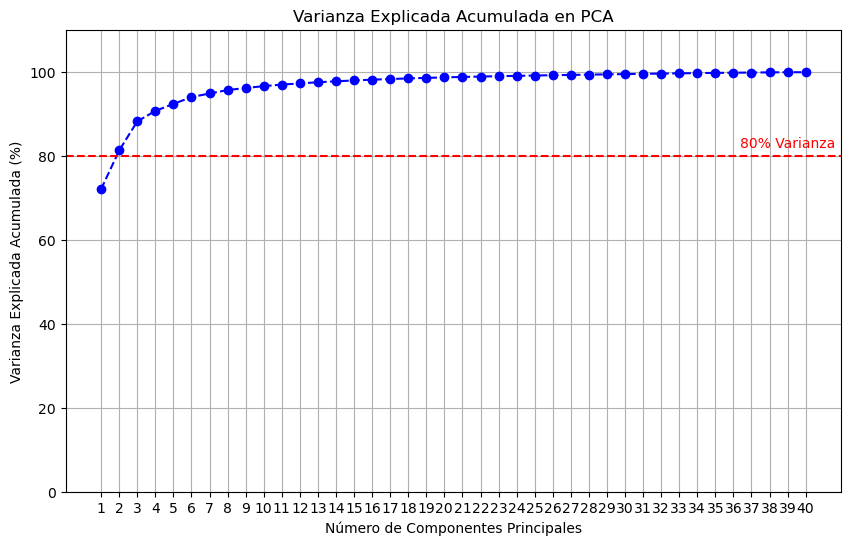

In [36]:
# Realizar PCA
pca = PCA()
pca.fit(dtSuppTransposeNormalized)

# Calcular la varianza explicada acumulada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada) * 100  # Multiplicar por 100 para obtener porcentajes

# Graficar % de varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada en PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada (%)')  # Cambiado a porcentaje
plt.xticks(range(1, len(varianza_acumulada) + 1))
plt.ylim(0, 110)  # Escala de 0 a 100%
plt.grid()

# Línea para el umbral del 95% (ajustar este valor si es necesario)
umbral_varianza = 80  # Cambia este valor si deseas otro umbral
plt.axhline(y=umbral_varianza, color='r', linestyle='--')  
plt.text(len(varianza_acumulada) - 1, umbral_varianza + 2, f'{umbral_varianza}% Varianza', color='red', ha='center')
plt.savefig('Graficas/%VarianzaExplicadaAcumuladaEspectroscopiaMasas.png')
plt.show()

In [37]:

## Varianza explicada por los 2 componentes
## Generacion de PCA
n_componentes = 2
pca = PCA(n_components=n_componentes)
valtn_transformado = pca.fit_transform(dtSuppTransposeNormalized)

# Mostrar la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_ * 100
print("Varianza explicada por cada uno de los 8 componentes:")
for i, var in enumerate(varianza_explicada, start=1):
    print(f"Componente {i}: {var:.2f}%")

# Guardar los datos transformados en un DataFrame
datos_pca = pd.DataFrame(data=valtn_transformado, columns=[f'Componente_{i}' for i in range(1, n_componentes + 1)])

# Mostrar las primeras filas del DataFrame transformado
print("\nPrimeras filas de los datos transformados:")
print(datos_pca.shape)
print(type(datos_pca))
print(datos_pca.head())

Varianza explicada por cada uno de los 8 componentes:
Componente 1: 72.17%
Componente 2: 9.21%

Primeras filas de los datos transformados:
(40, 2)
<class 'pandas.core.frame.DataFrame'>
   Componente_1  Componente_2
0      0.020986      0.003528
1      0.018113      0.004578
2      0.032063     -0.004886
3      0.022539     -0.003314
4      0.010698     -0.012285


## Analisís Reduccion Dimensionalidad

In [38]:
print(valt.shape)
print(dt_Supp_spect.shape)

(40, 55154)
(55154, 40)


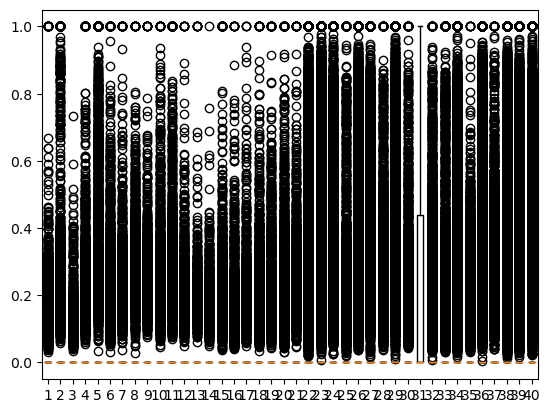

In [39]:
plt.boxplot(dt_Supp_spect)
plt.show()


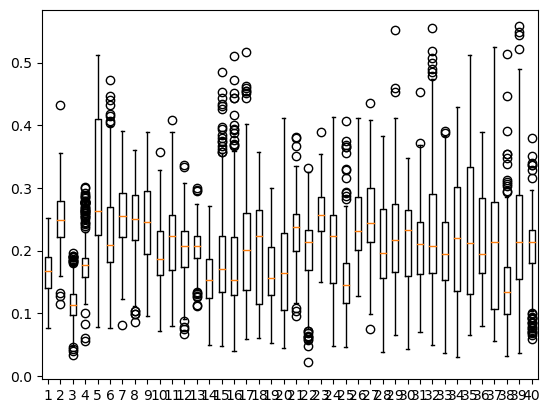

In [40]:
dt_Supp_spect.replace(0, np.nan, inplace=True)
plt.boxplot(dt_Supp_spect.dropna())  # dropna() elimina los NaN antes de hacer el boxplot
plt.show()


In [41]:
## Por cache valt pierde tambien sus valores 0 a nan
valt.head()

0         1         2         3         4         5         6      \
CR1  0.228485  0.288684  0.230525  0.166982  0.261907  0.143087  0.239547   
CR2  0.407509  0.341384  0.324244  0.229657  0.312893  0.225219  0.299156   
CR3  0.158843  0.179985  0.182672  0.143252  0.202207  0.091430  0.188030   
CR4  0.351245  0.353362  0.333561  0.218747  0.290228  0.164312  0.302438   
CR5  0.033447  0.102791  0.153943  0.231096  0.188807  0.179648  0.207757   

        7         8         9      ...  59682  59683  59684  59685  59686  \
CR1  0.210565  0.164406  0.198990  ...    NaN    NaN    NaN    NaN    NaN   
CR2  0.323037  0.222037  0.264886  ...    NaN    NaN    NaN    NaN    NaN   
CR3  0.135426  0.154087  0.228720  ...    NaN    NaN    NaN    NaN    NaN   
CR4  0.265793  0.227296  0.243436  ...    NaN    NaN    NaN    NaN    NaN   
CR5  0.116638  0.279470  0.245515  ...    NaN    NaN    NaN    NaN    NaN   

     59687  59688  59689  59690  59691  
CR1    NaN    NaN    NaN    NaN    NaN  
CR2    NaN    NaN    NaN    NaN    NaN  
CR3    NaN    NaN    NaN    NaN    NaN  
CR4    NaN    NaN    NaN    NaN    NaN  
CR5    NaN    NaN    NaN    NaN    NaN  

[5 rows x 55154 columns]

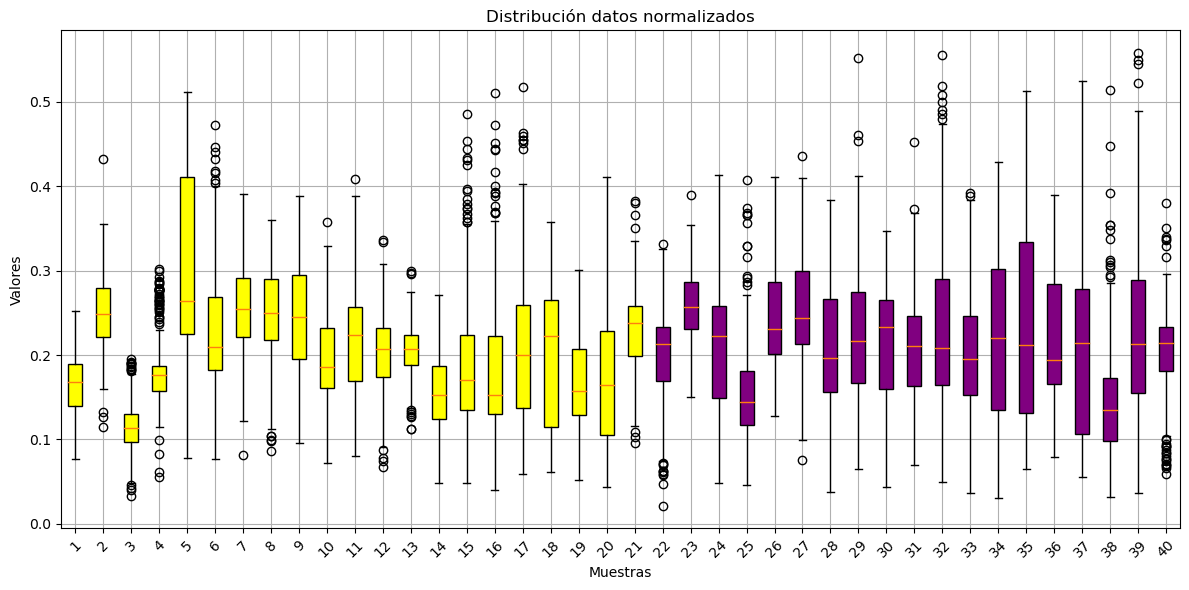

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Reemplazar ceros por NaN
dt_Supp_spect.replace(0, np.nan, inplace=True)

# Crear boxplot
plt.figure(figsize=(12, 6))

# Eliminar NaN antes de hacer el boxplot
box = plt.boxplot(dt_Supp_spect.dropna(), patch_artist=True)

# Colores para las cajas
colors = ['yellow' if i < 21 else 'purple' for i in range(len(box['boxes']))]

# Asignar colores a cada caja
for box_color, color in zip(box['boxes'], colors):
    box_color.set_facecolor(color)

# Personalización adicional
plt.title('Distribución datos normalizados')
plt.xticks(rotation=45)
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.grid(True)
plt.tight_layout()
plt.savefig('Graficas/BoxplotsCrudosFondosNormalizedColorized.png')
# Mostrar el gráfico
plt.show()


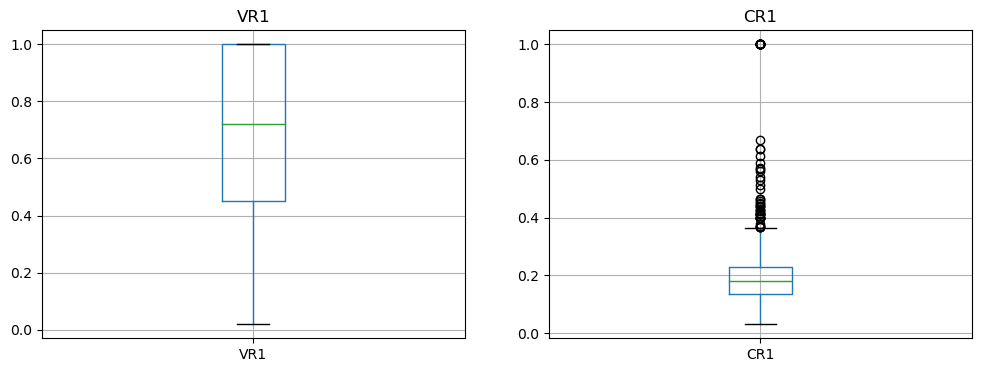

In [43]:
##analisis de la primera muestra de crudo y la primera muestra fondo por separado tras la normalizacion

import matplotlib.pyplot as plt

# Especifica el tamaño de la figura
plt.figure(figsize=(12, 4))

# Boxplot para la columna 'VR1'
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
dt_Supp_spect.boxplot(column=['VR1'])
plt.title('VR1')

# Boxplot para la columna 'CR1'
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
dt_Supp_spect.boxplot(column=['CR1'])
plt.title('CR1')


plt.show()

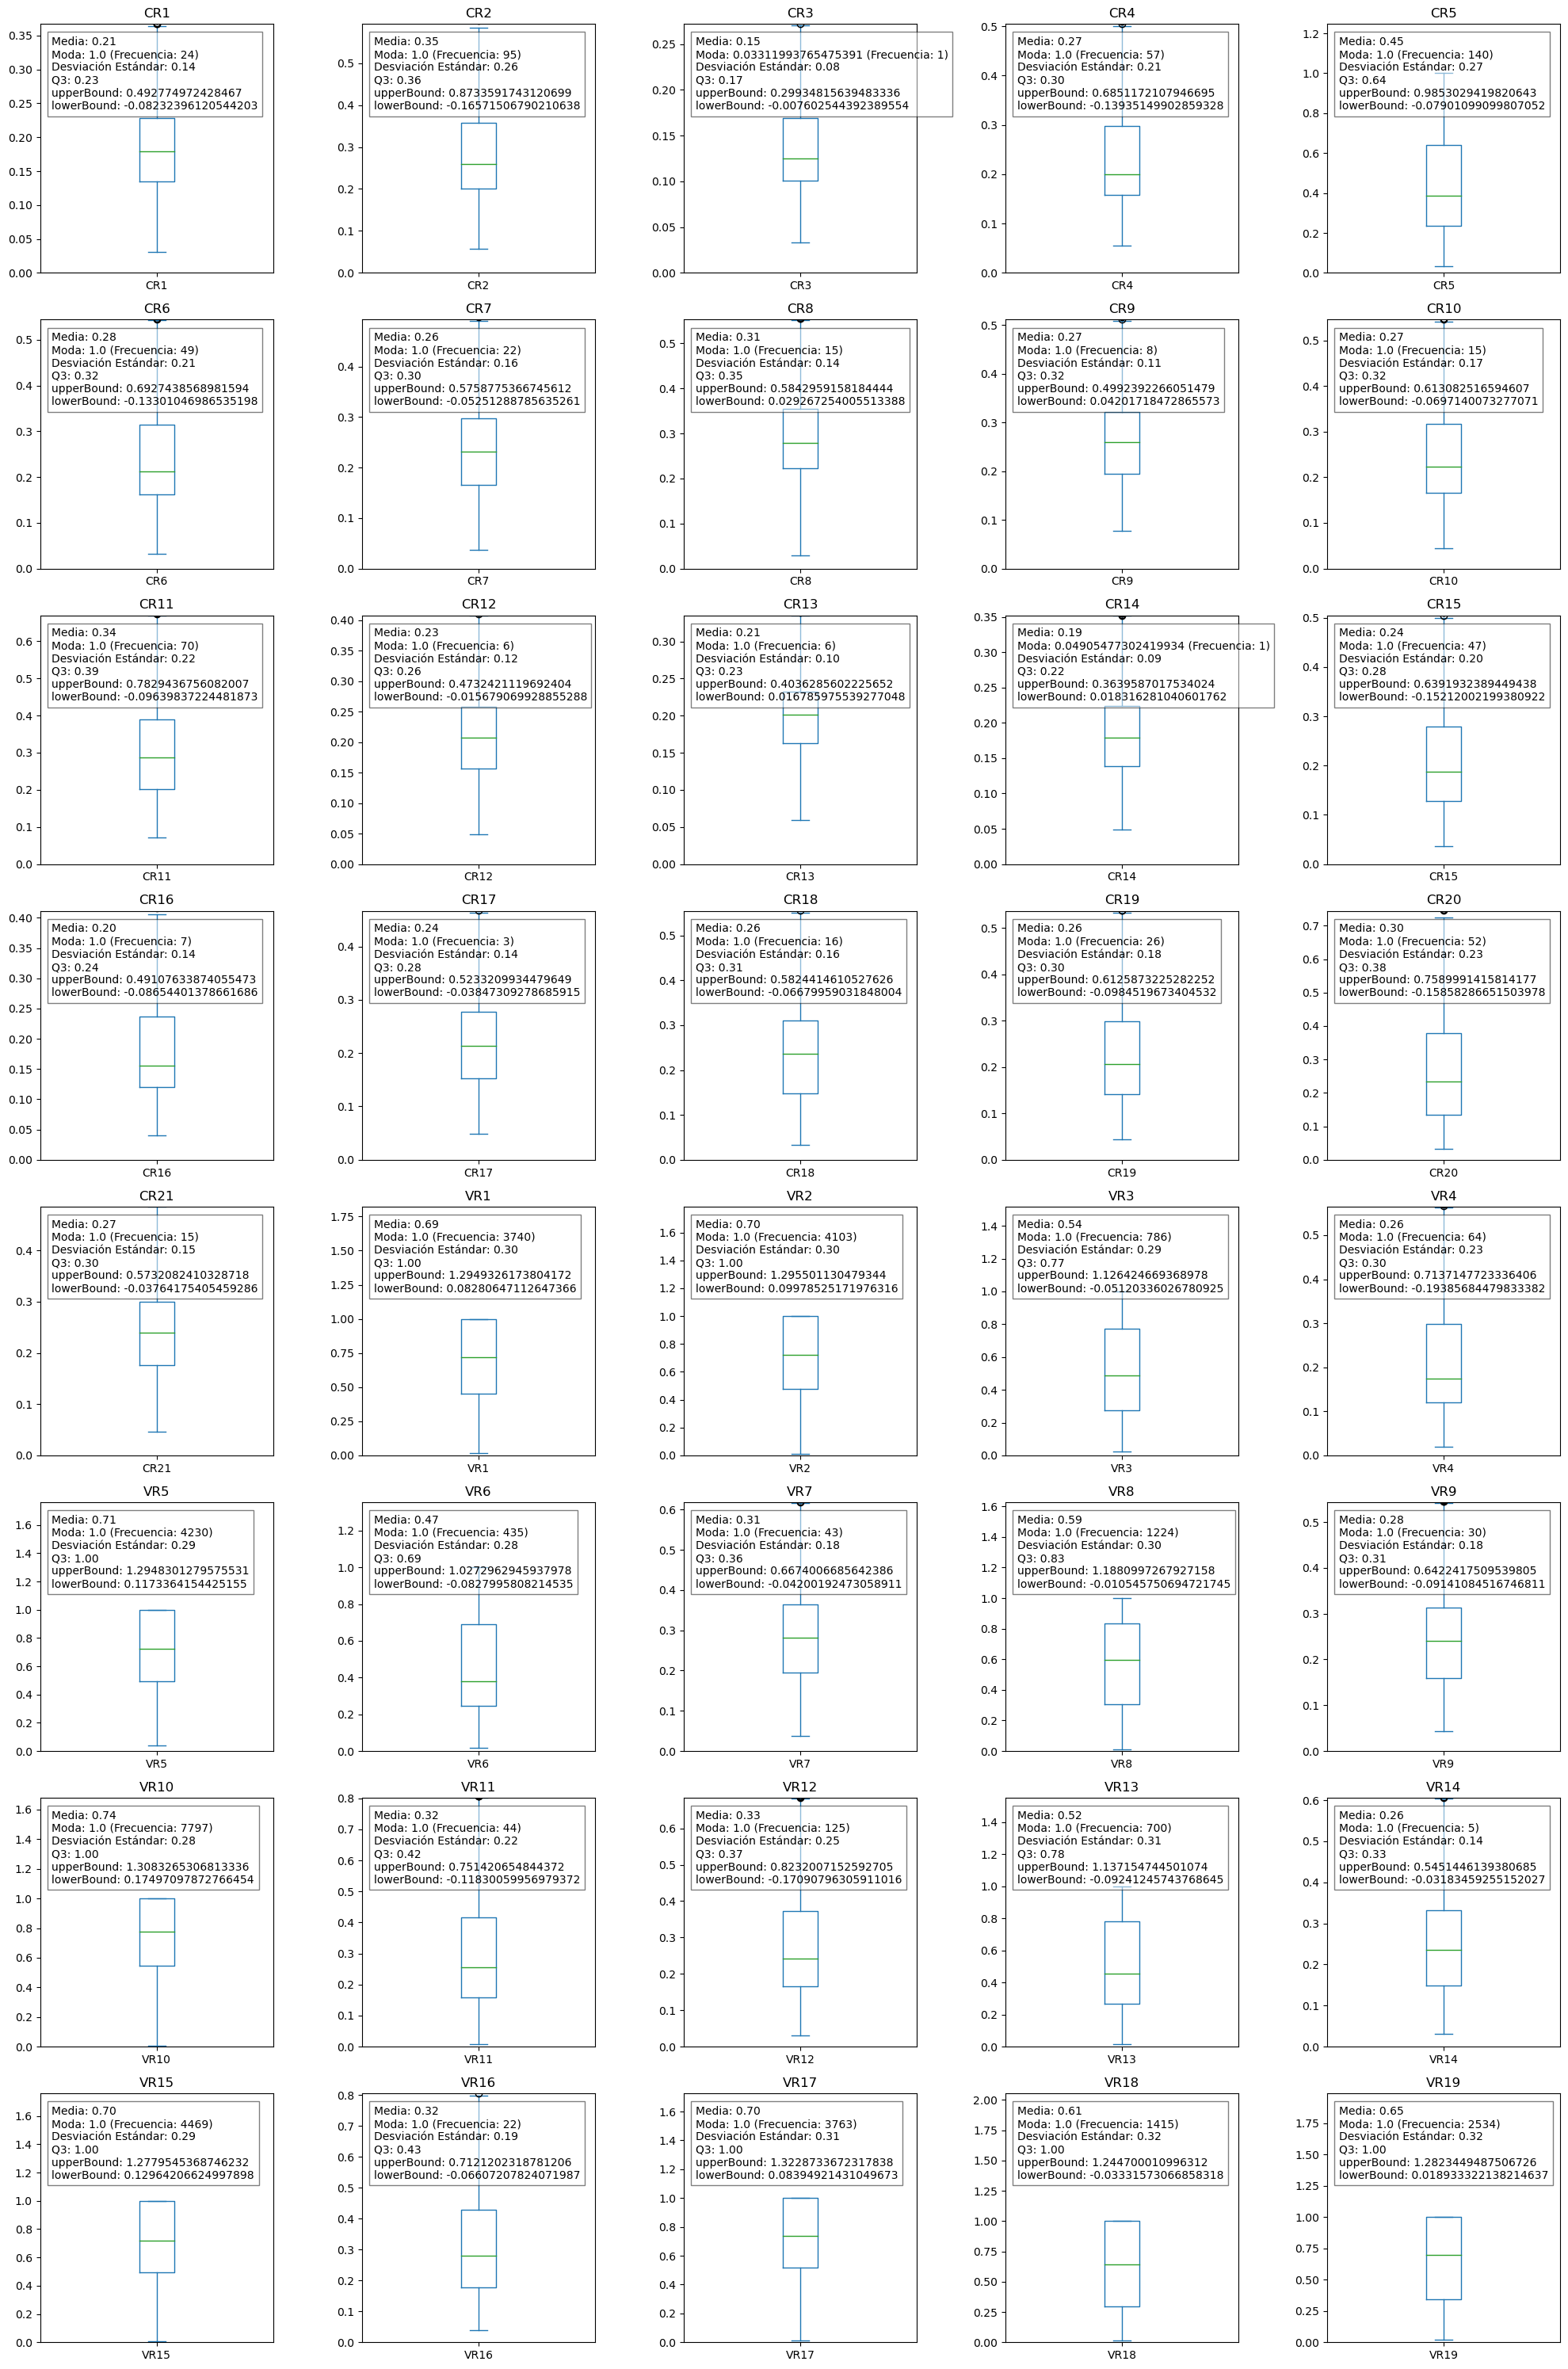

In [44]:
## Boxplot de cada muestra

import matplotlib.pyplot as plt

# Especifica el tamaño de la figura para cada boxplot
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 30))  # 8 filas y 5 columnas

# Itera sobre cada columna y genera el boxplot correspondiente
for i, column in enumerate(dt_Supp_spect.columns):
    row_index = i // 5  # Índice de la fila actual
    col_index = i % 5   # Índice de la columna actual
    dt_Supp_spect[column].plot(kind='box', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(column)  # Añade el nombre de la columna como título
    
    # Calcular media, moda, desviación estándar, Q3, y cantidad de datos fuera de Q3
    mean = dt_Supp_spect[column].mean()
    mode = dt_Supp_spect[column].mode().iloc[0]  # Puede haber más de una moda, tomamos la primera
    mode_count = dt_Supp_spect[column].value_counts().max()  # Cantidad de veces que se repite la moda
    std_dev = dt_Supp_spect[column].std()
    q3 = dt_Supp_spect[column].quantile(0.75)  # Tercer percentil (Q3)
    upperBound= mean+2*std_dev
    lowerBound= mean-2*std_dev
    # outliers_count = (dt_Supp_spect[column] > q3 + 1.5 * (q3 - dt_Supp_spect[column].quantile(0.25))).sum()  # Cantidad de datos fuera de Q3 (outliers)
    
    # Agregar información sobre media, moda, desviación estándar, Q3, y cantidad de datos fuera de Q3
    info_text = f"Media: {mean:.2f}\nModa: {mode} (Frecuencia: {mode_count})\nDesviación Estándar: {std_dev:.2f}\nQ3: {q3:.2f}\nupperBound: {upperBound}\nlowerBound: {lowerBound}"
    axes[row_index, col_index].text(0.05, 0.95, info_text, transform=axes[row_index, col_index].transAxes,
                                    verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    
    # Establecer el rango de valores en el eje y hasta el valor máximo excluyendo outliers
    axes[row_index, col_index].set_ylim(0, q3 + 1.5 * (q3 - dt_Supp_spect[column].quantile(0.25)))

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Guarda la figura como una imagen única
plt.savefig('Graficas/BoxplotsCrudosFondosTrunked.png')  # Puedes especificar la ruta y el nombre del archivo

# Muestra los gráficos
plt.show()



In [45]:
y1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
print(y1.shape)
print(datos_pca.shape)
datos_pca.head()

(40,)
(40, 2)


Componente_1  Componente_2
0      0.020986      0.003528
1      0.018113      0.004578
2      0.032063     -0.004886
3      0.022539     -0.003314
4      0.010698     -0.012285

In [47]:
## Pruebas que se hicieron con selectKbest para reduccion de dimensionalidad, (no dio resultado al final) 
# from sklearn.feature_selection import SelectKBest, f_classif

# # Asumiendo que 'y' es tu vector de etiquetas para clasificación
# # Ejemplo: y = np.array([...])  # Reemplaza esto con tus etiquetas reales

# # Aplicar SelectKBest
# k = 10  # Número de características que deseas seleccionar
# selector = SelectKBest(score_func=f_classif, k=k)
# X_new = selector.fit_transform(valtn, y1)  # valtn como datos de entrada

# # Obtener las características seleccionadas
# selected_features = selector.get_support(indices=True)
# print(f"Índices de características seleccionadas: {selected_features}")


In [48]:
# # valtn tiene forma (40, 55154)
# # y1 tiene forma (40,)

# # Aplicar SelectKBest
# k = 10  # Número de características a seleccionar
# selector = SelectKBest(score_func=f_classif, k=k)
# X_new = selector.fit_transform(valtn, y1)  # valtn como datos de entrada

# # Obtener las puntuaciones de las características
# scores = selector.scores_

# # Graficar las puntuaciones
# plt.figure(figsize=(10, 5))
# plt.bar(range(len(scores)), scores, color='skyblue', label='Características')
# plt.title('Puntuaciones de Características - SelectKBest')
# plt.xlabel('Características')
# plt.ylabel('Puntuación')
# plt.xticks(ticks=np.arange(0, len(scores), step=1000), rotation=90)  # Etiquetas en el eje x
# plt.grid()

# # Resaltar las características seleccionadas
# selected_features = selector.get_support(indices=True)

# # Aumentar el ancho de las barras de características seleccionadas
# plt.bar(selected_features, scores[selected_features], color='orange', label='Seleccionadas', alpha=0.7, width=0.5)

# plt.legend()
# plt.show()


In [49]:
# k = 10  # Número de características a seleccionar
# selector = SelectKBest(score_func=f_classif, k=k)
# X_new = selector.fit_transform(valtn, y1)  # valtn como datos de entrada

# # Convertir X_new a un DataFrame para una mejor visualización
# import pandas as pd

# # Crear un DataFrame con las características seleccionadas
# df_new = pd.DataFrame(X_new, columns=[f'Característica {i+1}' for i in range(k)])

# # Crear el boxplot
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df_new)
# plt.title('Boxplot de Características Seleccionadas con SelectKBest')
# plt.xlabel('Características')
# plt.ylabel('Valores')
# plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
# plt.savefig("Graficas/Boxplot_SelectKBest.png", dpi=300)
# plt.show()

In [50]:
# Prueba de encontrar el mejor k, tardo mucho

# from sklearn.model_selection import cross_val_score
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.svm import SVC
# import numpy as np
# Prueba de encontrar el mejor k, tardo mucho
# scores = []
# for k in range(1, valtn.shape[1] + 1):
#     selector = SelectKBest(score_func=f_classif, k=k)
#     X_new = selector.fit_transform(valtn, y1)
#     model = SVC()  # o el modelo que estés utilizando
#     score = cross_val_score(model, X_new, y1, cv=5).mean()  # Validación cruzada
#     scores.append(score)

# # Graficar el rendimiento del modelo frente a k
# plt.plot(range(1, valtn.shape[1] + 1), scores)
# plt.xlabel('Número de Características (k)')
# plt.ylabel('Precisión Media')
# plt.title('Rendimiento del Modelo vs. Número de Características')
# plt.show()


In [51]:
# import matplotlib.pyplot as plt

# # Crear un boxplot para los 5 componentes utilizando Matplotlib
# plt.figure(figsize=(10, 6))
# plt.boxplot([valtn_pca[f'Componente_{i}'] for i in range(1, 7)], labels=[f'Componente_{i}' for i in range(1, 7)])
# plt.title('Boxplot de los 6 Componentes Principales')
# plt.ylabel('Valores de los Componentes')
# plt.grid()
# plt.show()


In [52]:
# import matplotlib.pyplot as plt

# # Crear un boxplot para los 5 componentes utilizando Matplotlib
# plt.figure(figsize=(10, 6))
# plt.boxplot([valtn_pca[f'Componente_{i}'] for i in range(1, 7)], labels=[f'Componente_{i}' for i in range(1, 7)])
# plt.title('Boxplot de los 6 Componentes Principales')
# plt.ylabel('Valores de los Componentes')
# plt.ylim(-5, 1)  # Establecer los límites del eje y entre -5 y 5
# plt.savefig('Graficas/BoxplotPCAEspectroscopiaMasas.png')
# plt.grid()
# plt.show()


In [53]:


# pca=PCA(n_components=2) #
# pca.fit(valtn) # obtener los componentes principales
# datos_pca=pca.transform(valtn) # convertimos nuestros datos con las nuevas dimensiones de PCA
# print(datos_pca.shape)
# print(type(datos_pca))
# print(datos_pca)

In [54]:
# # Crear DataFrame de datos PCA
# datos_pca_df = pd.DataFrame(datos_pca, columns=['PC1', 'PC2'])

# # Ahora puedes imprimirlo de manera similar
# print(datos_pca_df.head())

In [55]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Convertir datos_pca a un DataFrame
# datos_pca_df = pd.DataFrame(datos_pca, columns=['Componente 1', 'Componente 2'])

# # Crear el boxplot
# plt.figure(figsize=(12, 8))
# datos_pca_df.boxplot()
# plt.title('Boxplot de Componentes Principales')
# plt.savefig('Graficas/BoxplotPCAFondosCrudos.png')
# plt.show()

In [56]:
#Prueba con datos SelectKBest
# Dividir en conjuntos de entrenamiento y prueba
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(datos_pca, y1, train_size=0.7, random_state=1234, shuffle=True)

# Ver las formas de los conjuntos
print(f"Forma del conjunto de entrenamiento: {X_tr1.shape}")
print(f"Forma del conjunto de prueba: {X_tr1.shape}")

print(y_tr1)

Forma del conjunto de entrenamiento: (28, 2)
Forma del conjunto de prueba: (28, 2)
[1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1]


In [57]:
# #Split con x=Datos PCA
# X_tr1, X_te1, y_tr1, y_te1 = train_test_split(valtn_pca, y1, train_size   = 0.7, random_state = 1234,shuffle = True) #Split valores PCA transformados

# X_tr2, X_te2, y_tr2, y_te2 = train_test_split(dt_Supp_spect_cleaned_transpose, y1, train_size   = 0.7, random_state = 1234,shuffle = True) ## Split normalizados, limpiando 0's

# X_tr2, X_te2, y_tr2, y_te2 = train_test_split(datos_pca, y1, train_size   = 0.7, random_state = 1234,shuffle = True) ## Datos normalizados de otra manera



# print(X_tr1.shape)
# print(X_tr2.shape)

## **Modelo** ML

In [58]:
print(np.unique(y_tr1)) 

[0 1]


In [59]:
SVC1 = SVC(C = 60, kernel = 'linear', random_state=123)
LDA = LinearDiscriminantAnalysis()

SVC1.fit(X_tr1, y_tr1)
LDA.fit(X_tr1, y_tr1)

#print(X_tr1.shape)
#print(y_tr1.shape)

LinearDiscriminantAnalysis()

In [60]:
# Predicciones test
# ==============================================================================
predicciones1 = SVC1.predict(X_te1)
#predicciones2 = modelo1.predict(X_te1)
prediccionesLDA = LDA.predict(X_te1)


print(predicciones1)
#print(predicciones2)
print(prediccionesLDA)

[1 0 1 1 1 0 1 1 1 0 1 1]
[1 0 1 1 1 0 1 1 1 0 1 1]


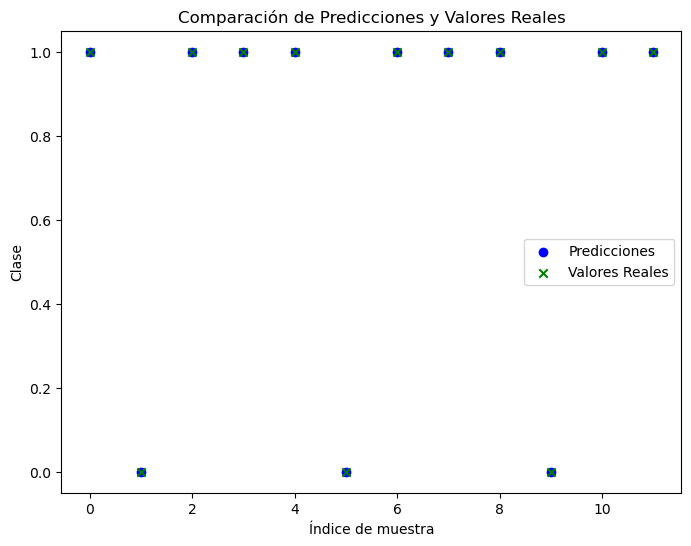

In [61]:
# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(range(len(prediccionesLDA)), prediccionesLDA, color='blue', label='Predicciones', marker='o')
plt.scatter(range(len(y_te1)), y_te1, color='green', label='Valores Reales', marker='x')

# Etiquetas y título
plt.title("Comparación de Predicciones y Valores Reales")
plt.xlabel("Índice de muestra")
plt.ylabel("Clase")
plt.legend()

# Mostrar gráfico
plt.show()

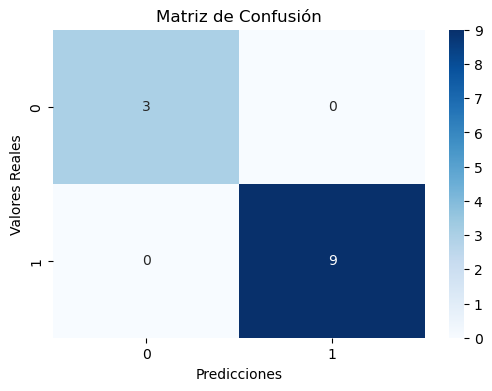

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar matriz de confusión
matriz_confusion = confusion_matrix(y_te1, prediccionesLDA)
# Plot matriz de confusión con heatmap de seaborn
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

plt.savefig("Graficas/ConfMatrixClasificadorCrudosFondo.png")


# Mostrar gráfico
plt.show()

## **Metricas**

In [63]:
# #Error medio absoluto
# RMAE_SVC = np.sqrt(mean_absolute_error(predicciones1, y_te1))
# RMAE_LDA = np.sqrt(mean_absolute_error(prediccionesLDA, y_te1))


# print(RMAE_SVC)
# print(RMAE_LDA)

In [64]:
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score
# Cálculo de Recall para SVC y LDA
recall_SVC = recall_score(y_te1, predicciones1, average='macro')  # Ajusta el promedio si es necesario
recall_LDA = recall_score(y_te1, prediccionesLDA, average='macro')

# Cálculo del AUC-ROC para SVC y LDA
auc_SVC = roc_auc_score(y_te1, predicciones1, multi_class='ovo')  # Si es clasificación binaria, quita el multi_class
auc_LDA = roc_auc_score(y_te1, prediccionesLDA, multi_class='ovo')

In [65]:
# Accuracy de test del modelo 
# ==============================================================================
accuracySVC = accuracy_score(y_te1,predicciones1,normalize = True)
accuracyLDA = accuracy_score(y_te1,prediccionesLDA,normalize = True)

print("")
print(f"El accuracy del test SVC es: {100*accuracySVC}%")
print(f"El accuracy del test LDA es: {100*accuracyLDA}%")



El accuracy del test SVC es: 100.0%
El accuracy del test LDA es: 100.0%


In [66]:
accuracySVCGraph = 100*accuracySVC
accuracyLDAGraph = 100*accuracyLDA

Métricas de evaluación para el modelo SVC:
Accuracy SVC: 100.00%
Recall SVC: 1.00
AUC-ROC SVC: 1.00

Métricas de evaluación para el modelo LDA:
Accuracy LDA: 100.00%
Recall LDA: 1.00
AUC-ROC LDA: 1.00


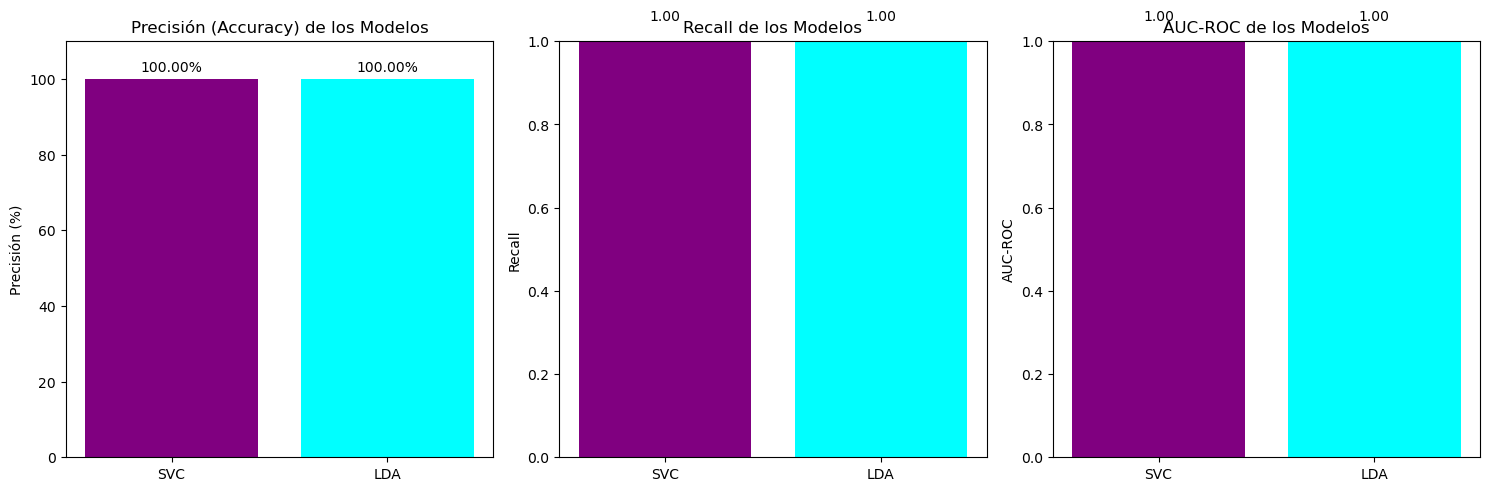

In [67]:
#Gráfica de barras comparativa: Accuracy y Recall
modelos = ['SVC', 'LDA']
accuracy = [accuracySVC * 100, accuracyLDA * 100]  # Accuracy en %
recall = [recall_SVC, recall_LDA]  # Recall
auc = [auc_SVC, auc_LDA]  # AUC-ROC

print("Métricas de evaluación para el modelo SVC:")
print(f"Accuracy SVC: {accuracySVC * 100:.2f}%")
print(f"Recall SVC: {recall_SVC:.2f}")
print(f"AUC-ROC SVC: {auc_SVC:.2f}")

print("\nMétricas de evaluación para el modelo LDA:")
print(f"Accuracy LDA: {accuracyLDA * 100:.2f}%")
print(f"Recall LDA: {recall_LDA:.2f}")
print(f"AUC-ROC LDA: {auc_LDA:.2f}")

# Crear gráfico de barras comparativo
plt.figure(figsize=(15, 5))

# Subgráfico para Accuracy
plt.subplot(1, 3, 1)
plt.bar(modelos, accuracy, color=['purple', 'cyan'])
plt.title('Precisión (Accuracy) de los Modelos')
plt.ylabel('Precisión (%)')
plt.ylim(0, 110)  # Limitar de 0 a 100%
for i, v in enumerate(accuracy):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center')

# Subgráfico para Recall
plt.subplot(1, 3, 2)
plt.bar(modelos, recall, color=['purple', 'cyan'])
plt.title('Recall de los Modelos')
plt.ylabel('Recall')
plt.ylim(0, 1)  # Limitar de 0 a 1
for i, v in enumerate(recall):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')

# Subgráfico para AUC-ROC
plt.subplot(1, 3, 3)
plt.bar(modelos, auc, color=['purple', 'cyan'])
plt.title('AUC-ROC de los Modelos')
plt.ylabel('AUC-ROC')
plt.ylim(0, 1)  # Limitar de 0 a 1
for i, v in enumerate(auc):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')

# Ajustar el diseño
plt.tight_layout()
plt.show()

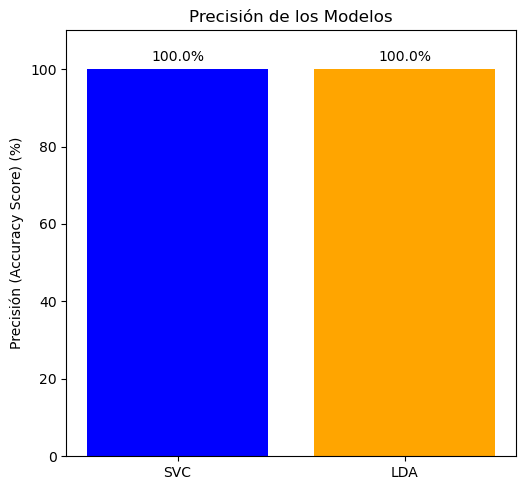

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
modelos = ['SVC', 'LDA']
accuracy = [accuracySVCGraph, accuracyLDAGraph]  # Accuracy en %
# rmae = [accuracySVC, accuracyLDA]      # RMAE

# Gráfico de barras comparativo para accuracy
plt.figure(figsize=(10, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.bar(modelos, accuracy, color=['blue', 'orange'])
plt.title('Precisión de los Modelos')
plt.ylabel('Precisión (Accuracy Score) (%)')
plt.ylim(0, 110)  # Limitar de 0 a 100%
for i, v in enumerate(accuracy):
    plt.text(i, v + 2, f"{v}%", ha='center')

# Gráfico de barras comparativo para RMAE
# plt.subplot(1, 2, 2)
# plt.bar(modelos, rmae, color=['blue', 'orange'])
# plt.title('MAE de los Modelos')
# plt.ylabel('MAE')
# plt.ylim(0, 1)  # Limitar de 0 a 1
# for i, v in enumerate(rmae):
#     plt.text(i, v + 0.05, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()

## **Graficas**

In [59]:
print (X_tr1.shape)
print (X_te1.shape)
print (y_tr1.shape)
print (y_te1.shape)
print(predicciones1.shape)

(28, 2)
(12, 2)
(28,)
(12,)
(12,)


In [62]:
# Grafica prueba de SelectKBest
# prediccionesTotales = LDA.predict(X_new) 
# prediccionesTotales.shape

In [64]:
type(datos_pca)

pandas.core.frame.DataFrame

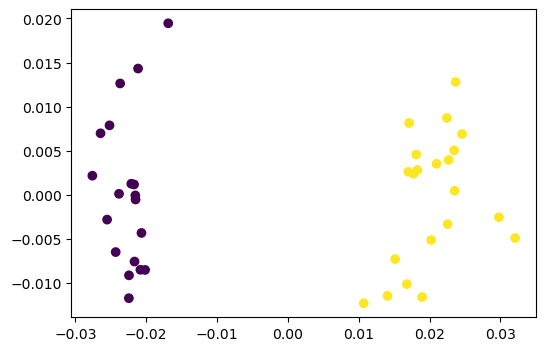

In [151]:
# Convierte el DataFrame en un array de NumPy
datos_pca_np = datos_pca.values

# Realiza la gráfica con el array de NumPy
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos_pca_np[:, 0], datos_pca_np[:, 1], c=y1)
plt.savefig("Graficas/ClasificadorCrudosFondo.png")
plt.show()

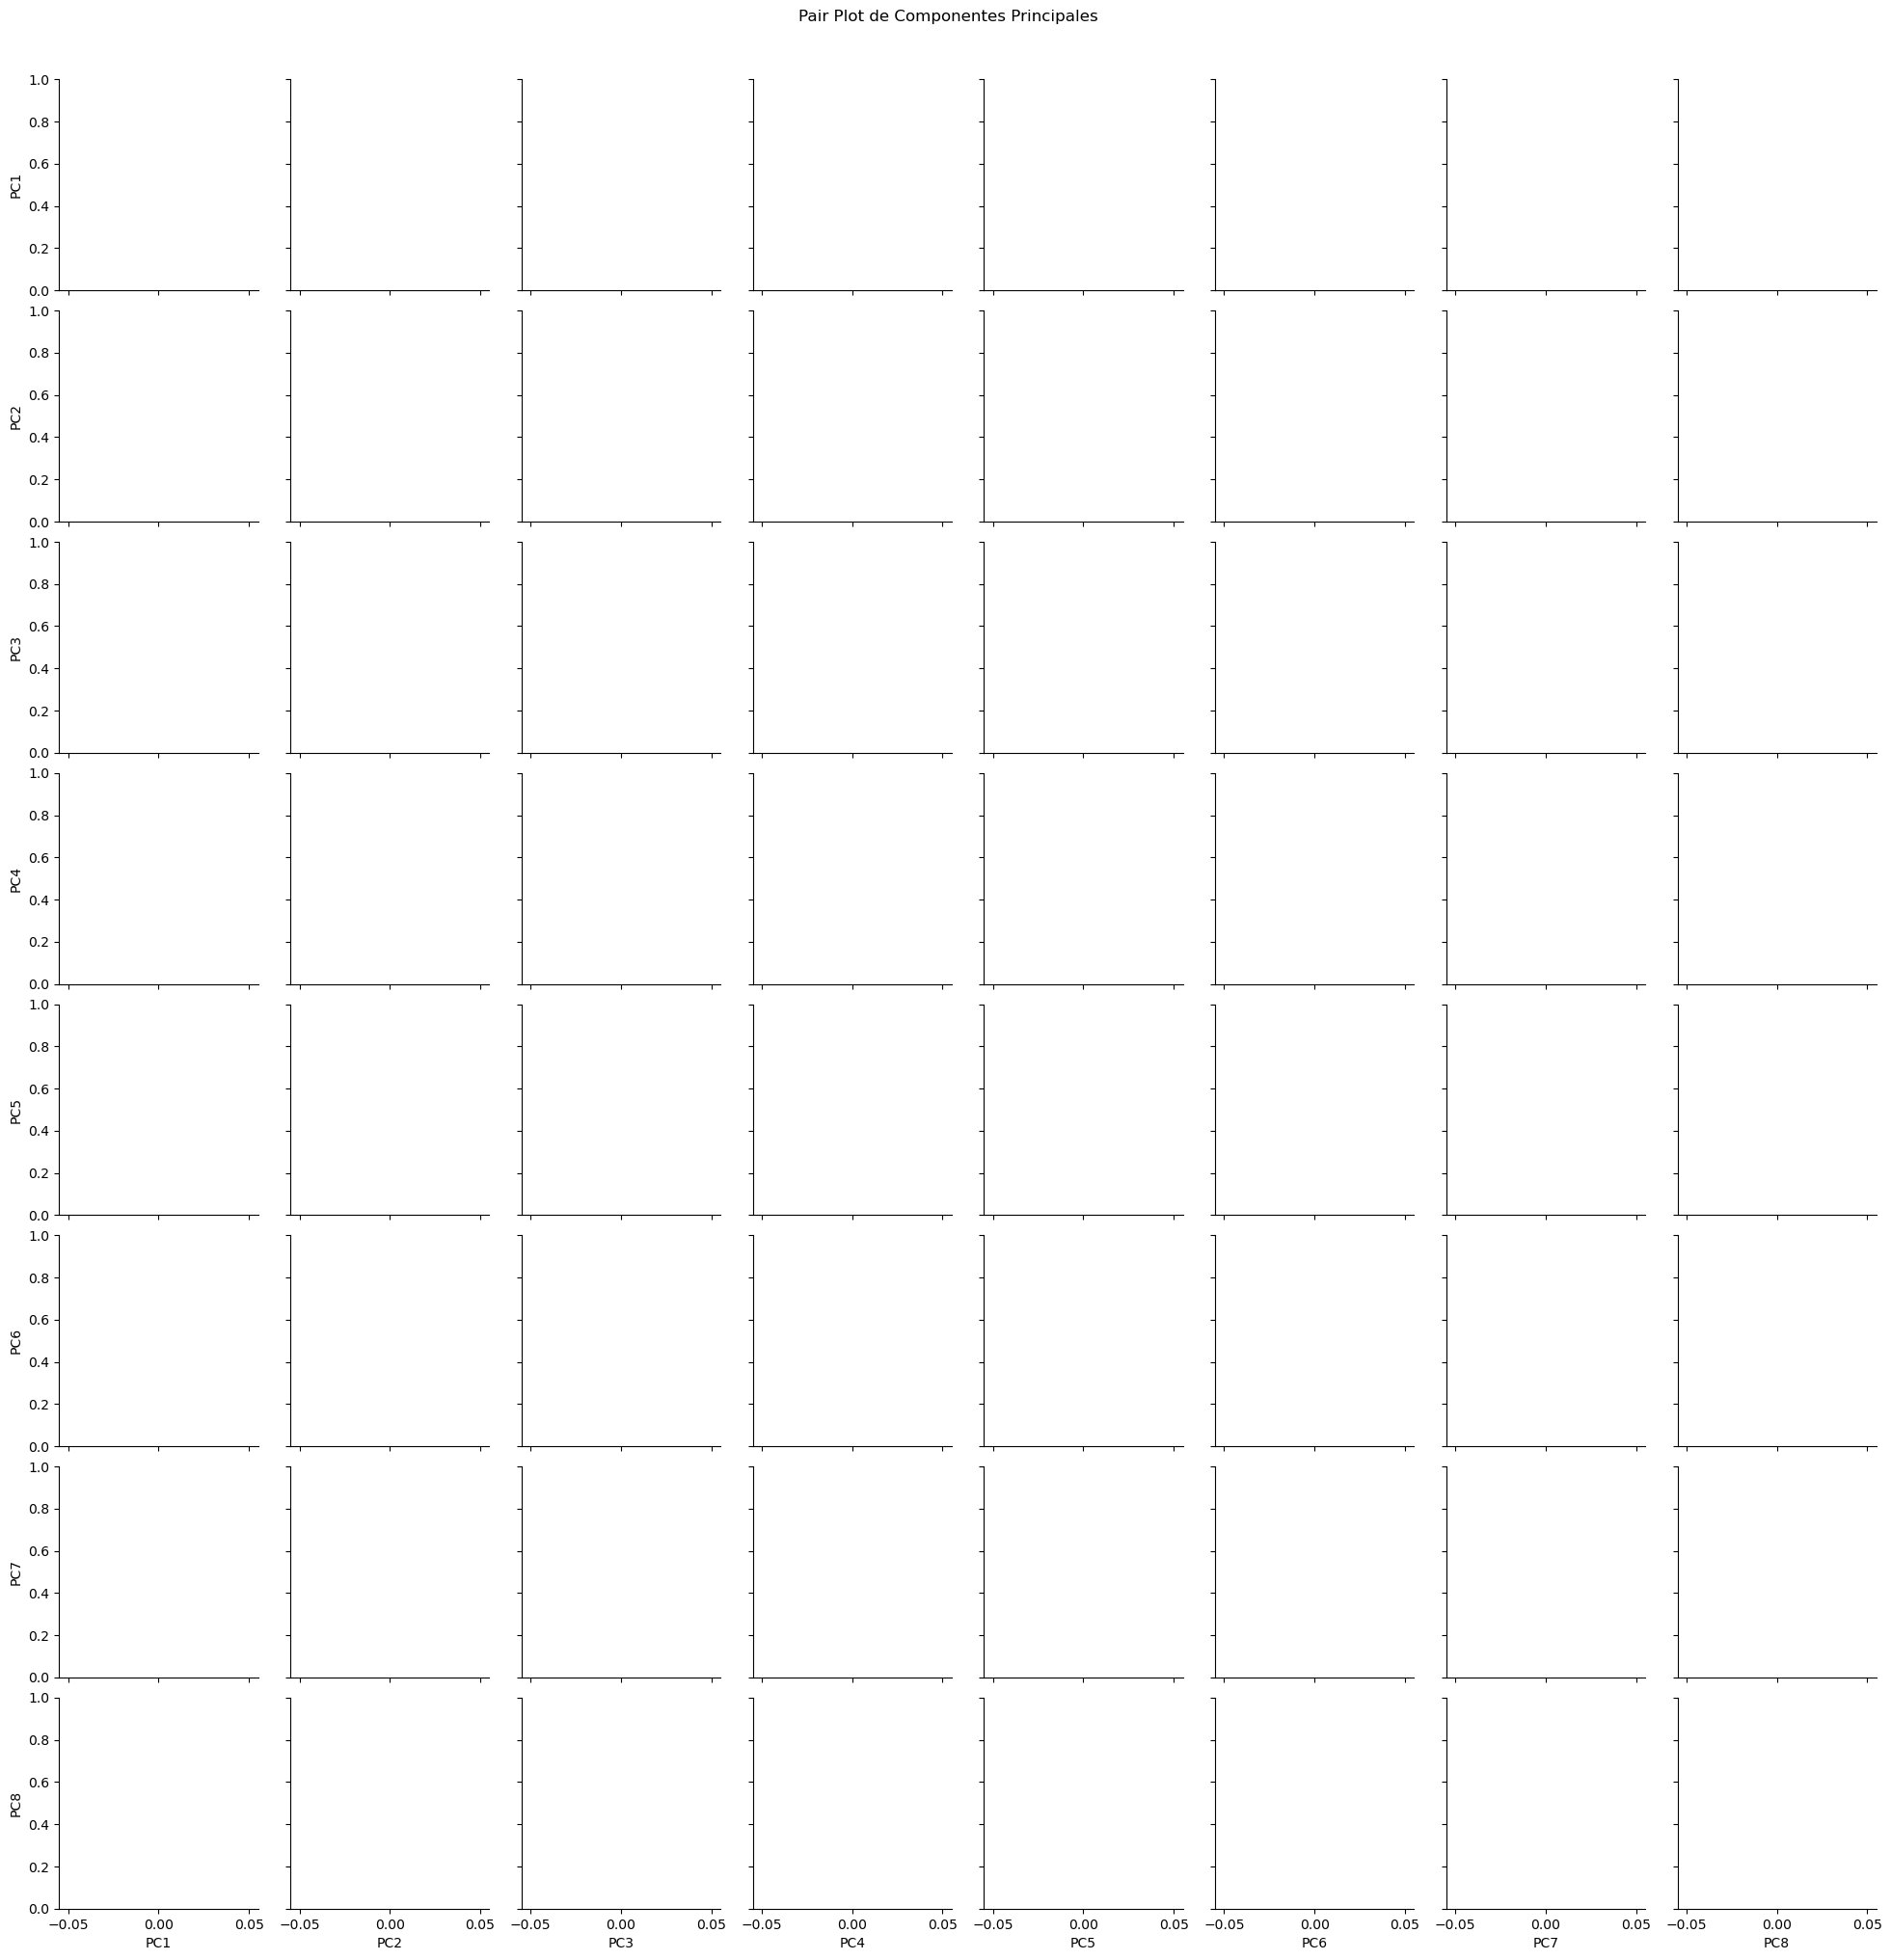

In [158]:
import seaborn as sns
import pandas as pd

# Suponiendo que valtn_pca es tu DataFrame con 8 componentes principales
valtn_pca_df = pd.DataFrame(valtn_pca, columns=[f'PC{i+1}' for i in range(8)])

# Crear el pair plot
sns.pairplot(valtn_pca_df)
plt.suptitle('Pair Plot de Componentes Principales', y=1.02)
plt.savefig("Graficas/PairPlotComponentesPrincipales.png")
plt.show()


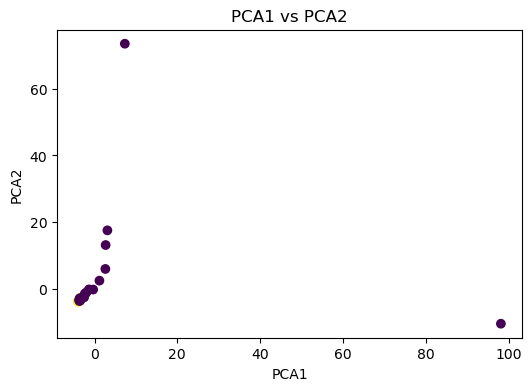

In [160]:
# Convierte el DataFrame valtn_pca en un array de NumPy
valtn_pca_np = valtn_pca.values

# Realiza la gráfica de los dos primeros componentes principales de valtn_pca
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(valtn_pca_np[:, 0], valtn_pca_np[:, 1], c=y1)  # Aquí se asume que 'y1' es tu variable de clasificación
ax.set_title("PCA1 vs PCA2")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
plt.savefig("Graficas/ValtnPCA_PCA1_PCA2.png")
plt.show()


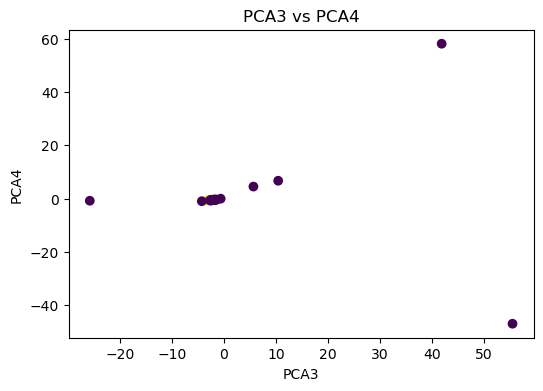

In [161]:
# Grafica PCA3 vs PCA4
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(valtn_pca_np[:, 2], valtn_pca_np[:, 3], c=y1)
ax.set_title("PCA3 vs PCA4")
ax.set_xlabel("PCA3")
ax.set_ylabel("PCA4")
plt.savefig("Graficas/ValtnPCA_PCA3_PCA4.png")
plt.show()


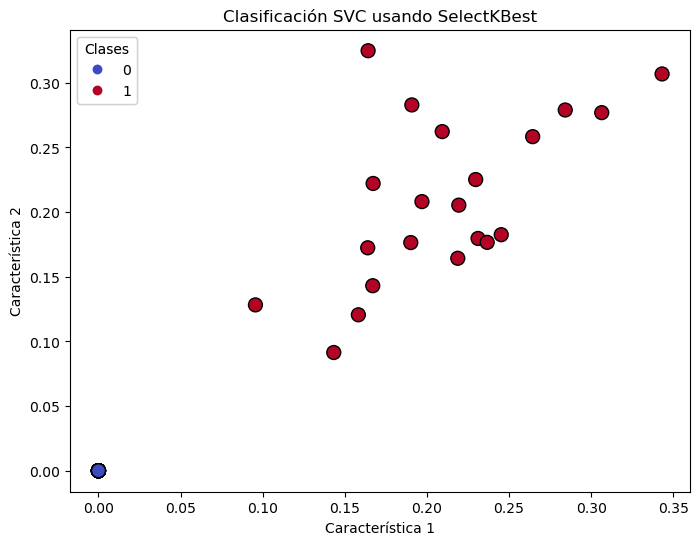

In [84]:
# import matplotlib.pyplot as plt

# # Asumiendo que X_new es el resultado de SelectKBest y tiene al menos 2 características
# # Si solo seleccionaste 10 características, debes usar solo las dos que deseas graficar
# X_new_2D = X_new[:, :2]  # Selecciona las dos primeras características

# # Graficar las predicciones
# fig, ax = plt.subplots(figsize=(8, 6))

# # Crear el gráfico de dispersión
# scatter = ax.scatter(X_new_2D[:, 0], X_new_2D[:, 1], c=prediccionesTotales, cmap='coolwarm', edgecolor='k', s=100)

# # Títulos y etiquetas
# ax.set_title('Clasificación SVC usando SelectKBest')
# ax.set_xlabel('Característica 1')
# ax.set_ylabel('Característica 2')

# # Añadir barra de color
# legend1 = ax.legend(*scatter.legend_elements(), title="Clases")
# ax.add_artist(legend1)

# # Guardar la figura
# plt.savefig("Graficas/ClasificadorPrediccionesTotales.png", dpi=300)
plt.show()


In [71]:
# fig, ax = plt.subplots(figsize=(6,4))
# scatter = ax.scatter(X_te1[:, 0], X_te1[:, 1], c=predicciones1, cmap='coolwarm', edgecolor='k', s=100)
# plt.savefig("Graficas/ClasificadorCrudosFondo.png")
# plt.show()

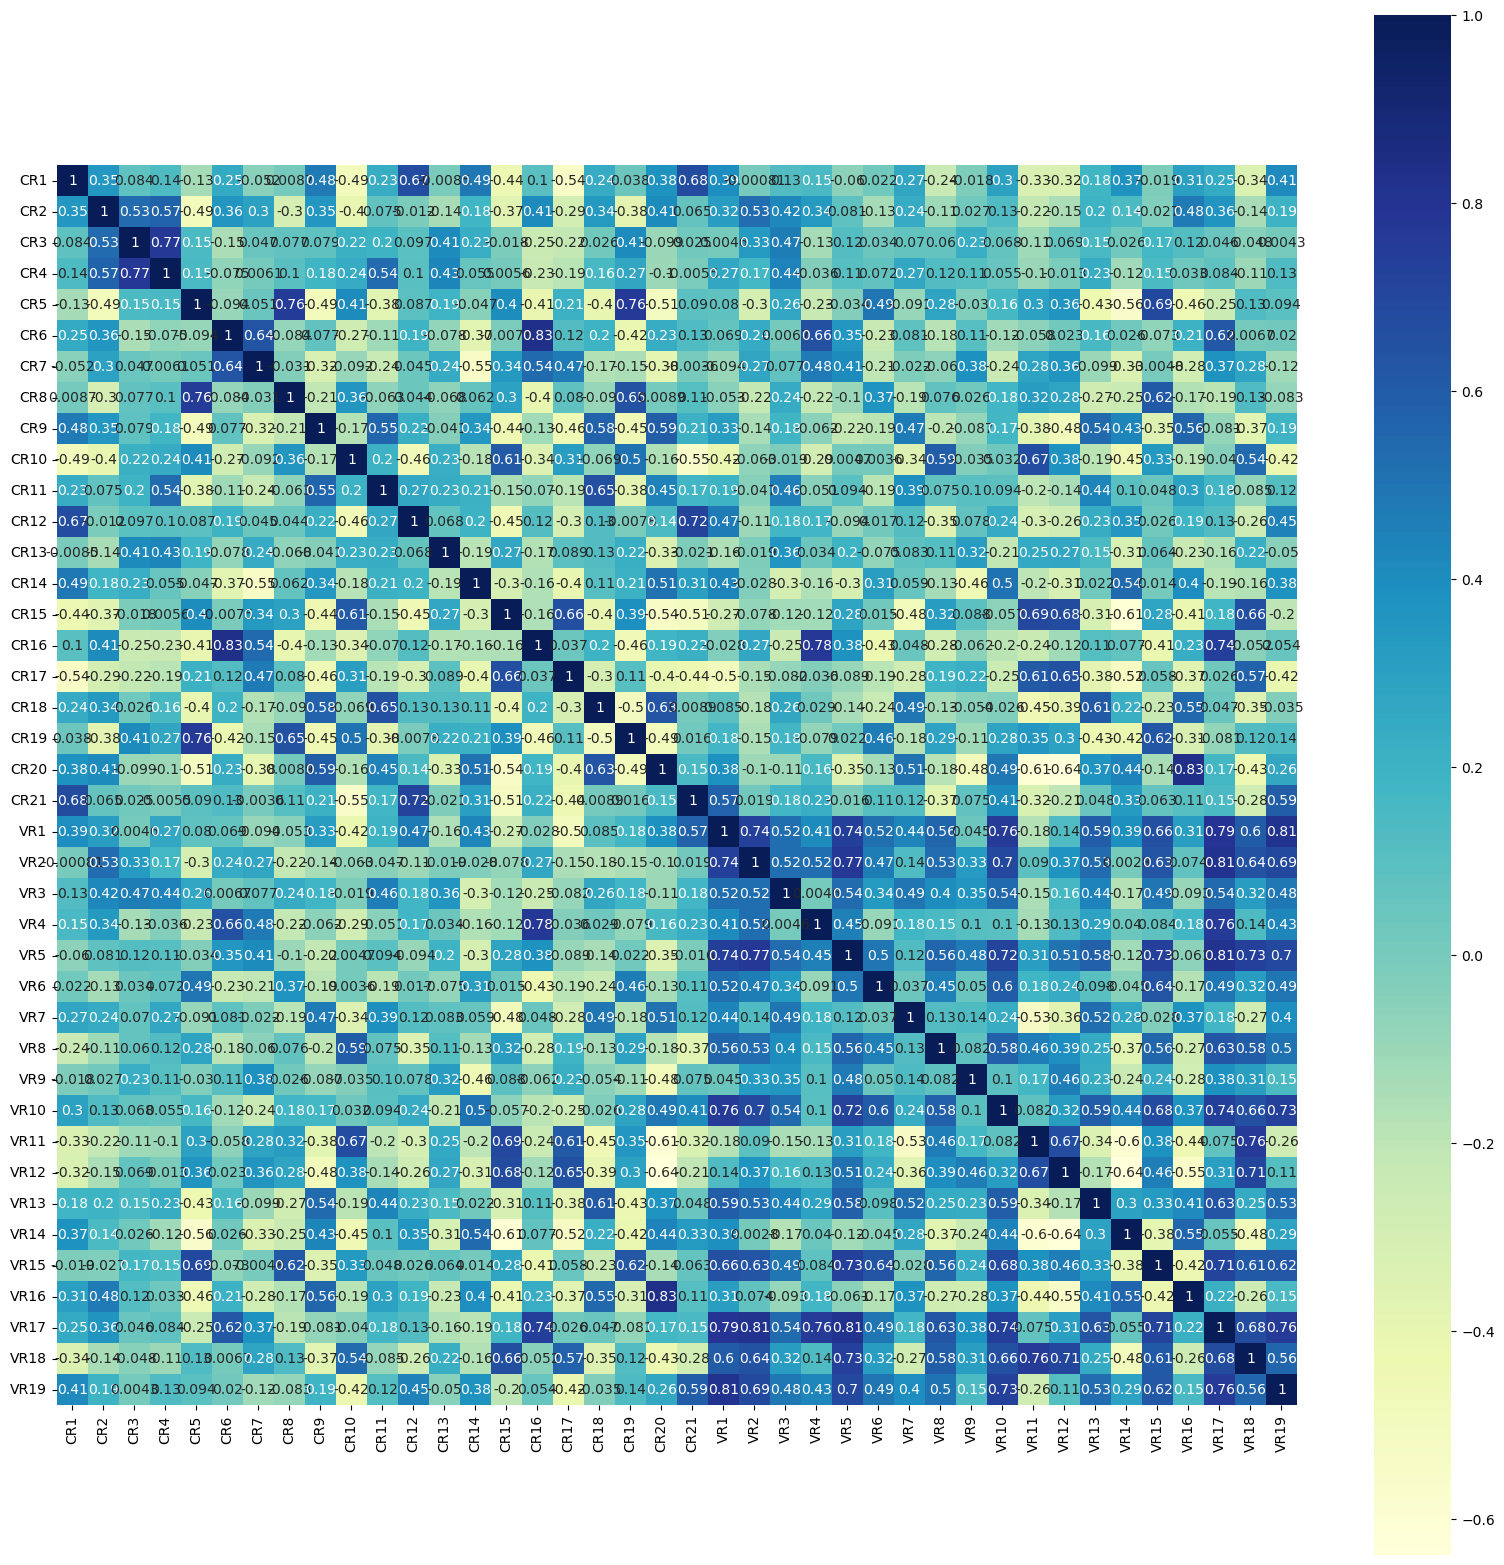

In [74]:
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(dt_Supp_spect.corr(), square=True, annot=True, cmap="YlGnBu")
plt.savefig("Graficas/heatmapCrudosFondos.png") 
plt.show()